In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# ___library_import_statements___
import pandas as pd
# make pandas to print dataframes nicely
pd.set_option('expand_frame_repr', False)  
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
import weekly_returns_heatmap as wrh
import numpy as np

In [2]:
#from pandas_datareader import data
#prices = data.get_data_yahoo("SPY", start="2000-1-1", end="2020-12-31")['Close']
#returns = prices.pct_change()
#wrh.plot(returns, title="SPY Monthly (%)", figsize=(15,10))

In [3]:
#TIME NOW:
my_date = datetime.date.today()
year, week_num, day_of_week = my_date.isocalendar()
print("Day #" + my_date.strftime('%-j') + " Week #" + str(week_num) + " of year " + str(year))

Day #166 Week #24 of year 2021


In [4]:
from datetime import date, time, datetime
custom = date(year=2021, month=6, day=14)
year, week_num, day_of_week = custom.isocalendar()
print("Day #" + custom.strftime('%-j') + " Week #" + str(week_num) + " of year " + str(year))

Day #165 Week #24 of year 2021


In [5]:
day_of_week #MON => 1

1

# Daily 

In [6]:
def pos_neg(heat):
    poss, negs = [], []
    pos, neg = 0,0
    for c in heat.columns:
        for i in heat[c]:
            if i > 0:
                pos+=1
            elif i < 0: 
                neg+=1
        #print(c)
        poss.append(pos)
        negs.append(neg)
        #print("Num POS: ", pos)
        #print("NUM NEG: ", neg)
        #print("\n")
        pos=0
        neg=0
    
    positive = pd.Series(poss)
    negative = pd.Series(negs)
    return positive, negative

In [25]:
from pandas_datareader import data
import monthly_returns_heatmap as mrh

prices = data.get_data_yahoo("IWM", start="2001-1-1", end="2020-12-31")['Close']
returns = prices.pct_change()

def sum_returns(returns, groupby, compounded=True):
    def returns_prod(data):
        return (data + 1).prod() - 1
    if compounded:
        return returns.groupby(groupby).apply(returns_prod)
    return returns.groupby(groupby).sum()

returns = prices.pct_change()
returns = pd.DataFrame(sum_returns(returns, 
                       returns.index.strftime('%b-%-d'),False))
a = returns.reset_index()
returns['Day'] = a['Date'].str.slice(4,).values
returns['Month'] = a['Date'].str.slice(0,3).values

returns.columns = ['Returns', 'Day', 'Month']
# make pivot table
returns = returns.pivot('Month', 'Day', 'Returns')

heat = returns*100
heat.columns = [int(numeric_string) for numeric_string in heat.columns]
heat = heat.reindex(sorted(heat.columns), axis=1)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
heat=heat.reindex(months)
heat

1          2          3         4          5         6          7         8          9          10  ...         22        23         24        25         26         27         28         29         30        31
Month                                                                                                             ...                                                                                                           
Jan          NaN   8.629183   7.211927 -0.227522  -5.787505 -0.665922  -4.303587  0.862596  -1.361649  12.023093  ...  -2.909230  8.677263  -0.899848 -0.026990   8.679279  -3.657646   1.618195  -1.904669  -6.561173  3.969938
Feb    11.588867  -3.968386   1.736397 -6.318253  -4.516663  6.683414  -2.689717 -2.777741  -3.795932  -0.878063  ...  -0.995329 -6.653567   3.921523  2.223823   2.182756  -8.383174 -10.476106  -4.016891        NaN       NaN
Mar    12.745442  -3.656313  -2.820673  9.039487  -5.488783 -5.551828  -1.487054 -0.470577 -12.583311   1.146459  ...  -8.697519  7.926675   4.938013  3.646332  13.923248  -8.345144  -4.607734   8.250045   6.941539  0.497106
Apr     4.010690   5.270198  -7.111106 -0.821989   6.892788  3.755845  -8.249277  6.705173   9.073798   6.147685  ...   2.438039  2.725893   4.788601  2.843289   2.792933   0.818375  -1.467324  10.072150 -13.193049       NaN
May    -2.240878   8.219746   0.422385  3.324202  -1.745214 -4.852942 -10.335820  8.959428   1.525570   4.397642  ...  -1.782933 -3.411618   1.274548  5.006375  10.794231  14.272411  -2.568767   0.788415  -2.061635 -0.018800
Jun     4.906678   5.441295  -1.846706  2.152109   9.382015 -3.592087  -1.390970  2.697573  -4.241034   0.895806  ...  -6.004277 -0.064680 -15.945156  4.138617  -0.831678   3.714718   6.540016   8.525386   3.030304       NaN
Jul     2.456009 -10.338986   2.235855       NaN   3.106477 -7.141624   0.134243  3.604038   0.099320  -6.342420  ...   9.994574 -2.565514  -1.795234 -0.469110   2.781915  -3.866312  -0.321931   8.124321   4.943518 -6.884079
Aug    -4.918617  -5.469011   0.554139 -6.770921  -9.079549  0.007715   3.887850 -2.707710   3.067698  -4.890790  ...   6.312145 -6.566672   0.889746 -1.225515   5.734759   0.159322   1.210490  14.331988  -7.019286  1.678433
Sep     0.238356   4.508674  -4.850024  1.801728  -2.478787  1.373046   0.121099  2.096696  -4.161984   1.585815  ... -11.753434 -9.281513  -3.609163  0.096300  -0.627368   3.187515   0.783451  -5.837844   0.130400       NaN
Oct     4.375781  -4.507710  -3.016460  4.829610  11.149850 -2.972498 -11.993928 -3.283008 -13.338397  14.481658  ...  -3.881373 -3.055945  -1.937311  4.792410  -1.133584  -4.385352   9.081311   0.769611   0.819952  7.023125
Nov    -2.098038   7.263167  11.297833  5.695080   3.175379  3.866936  -4.668496  0.703419  -2.264679   3.564105  ...   3.627043  5.853078  15.110369  4.646598   5.446259  -0.819357   9.560285   3.176228   4.276340       NaN
Dec    -5.553782   6.926310  -3.157082  0.411213   9.716309  6.904810  -4.543417  3.761834  -4.853380   2.552102  ...   0.875833  4.041276  -0.581744       NaN   9.365540  -4.128657  -3.650450  -1.502729  -0.340180 -2.400601

[12 rows x 31 columns]

(<Figure size 3600x1800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ee76d60>)

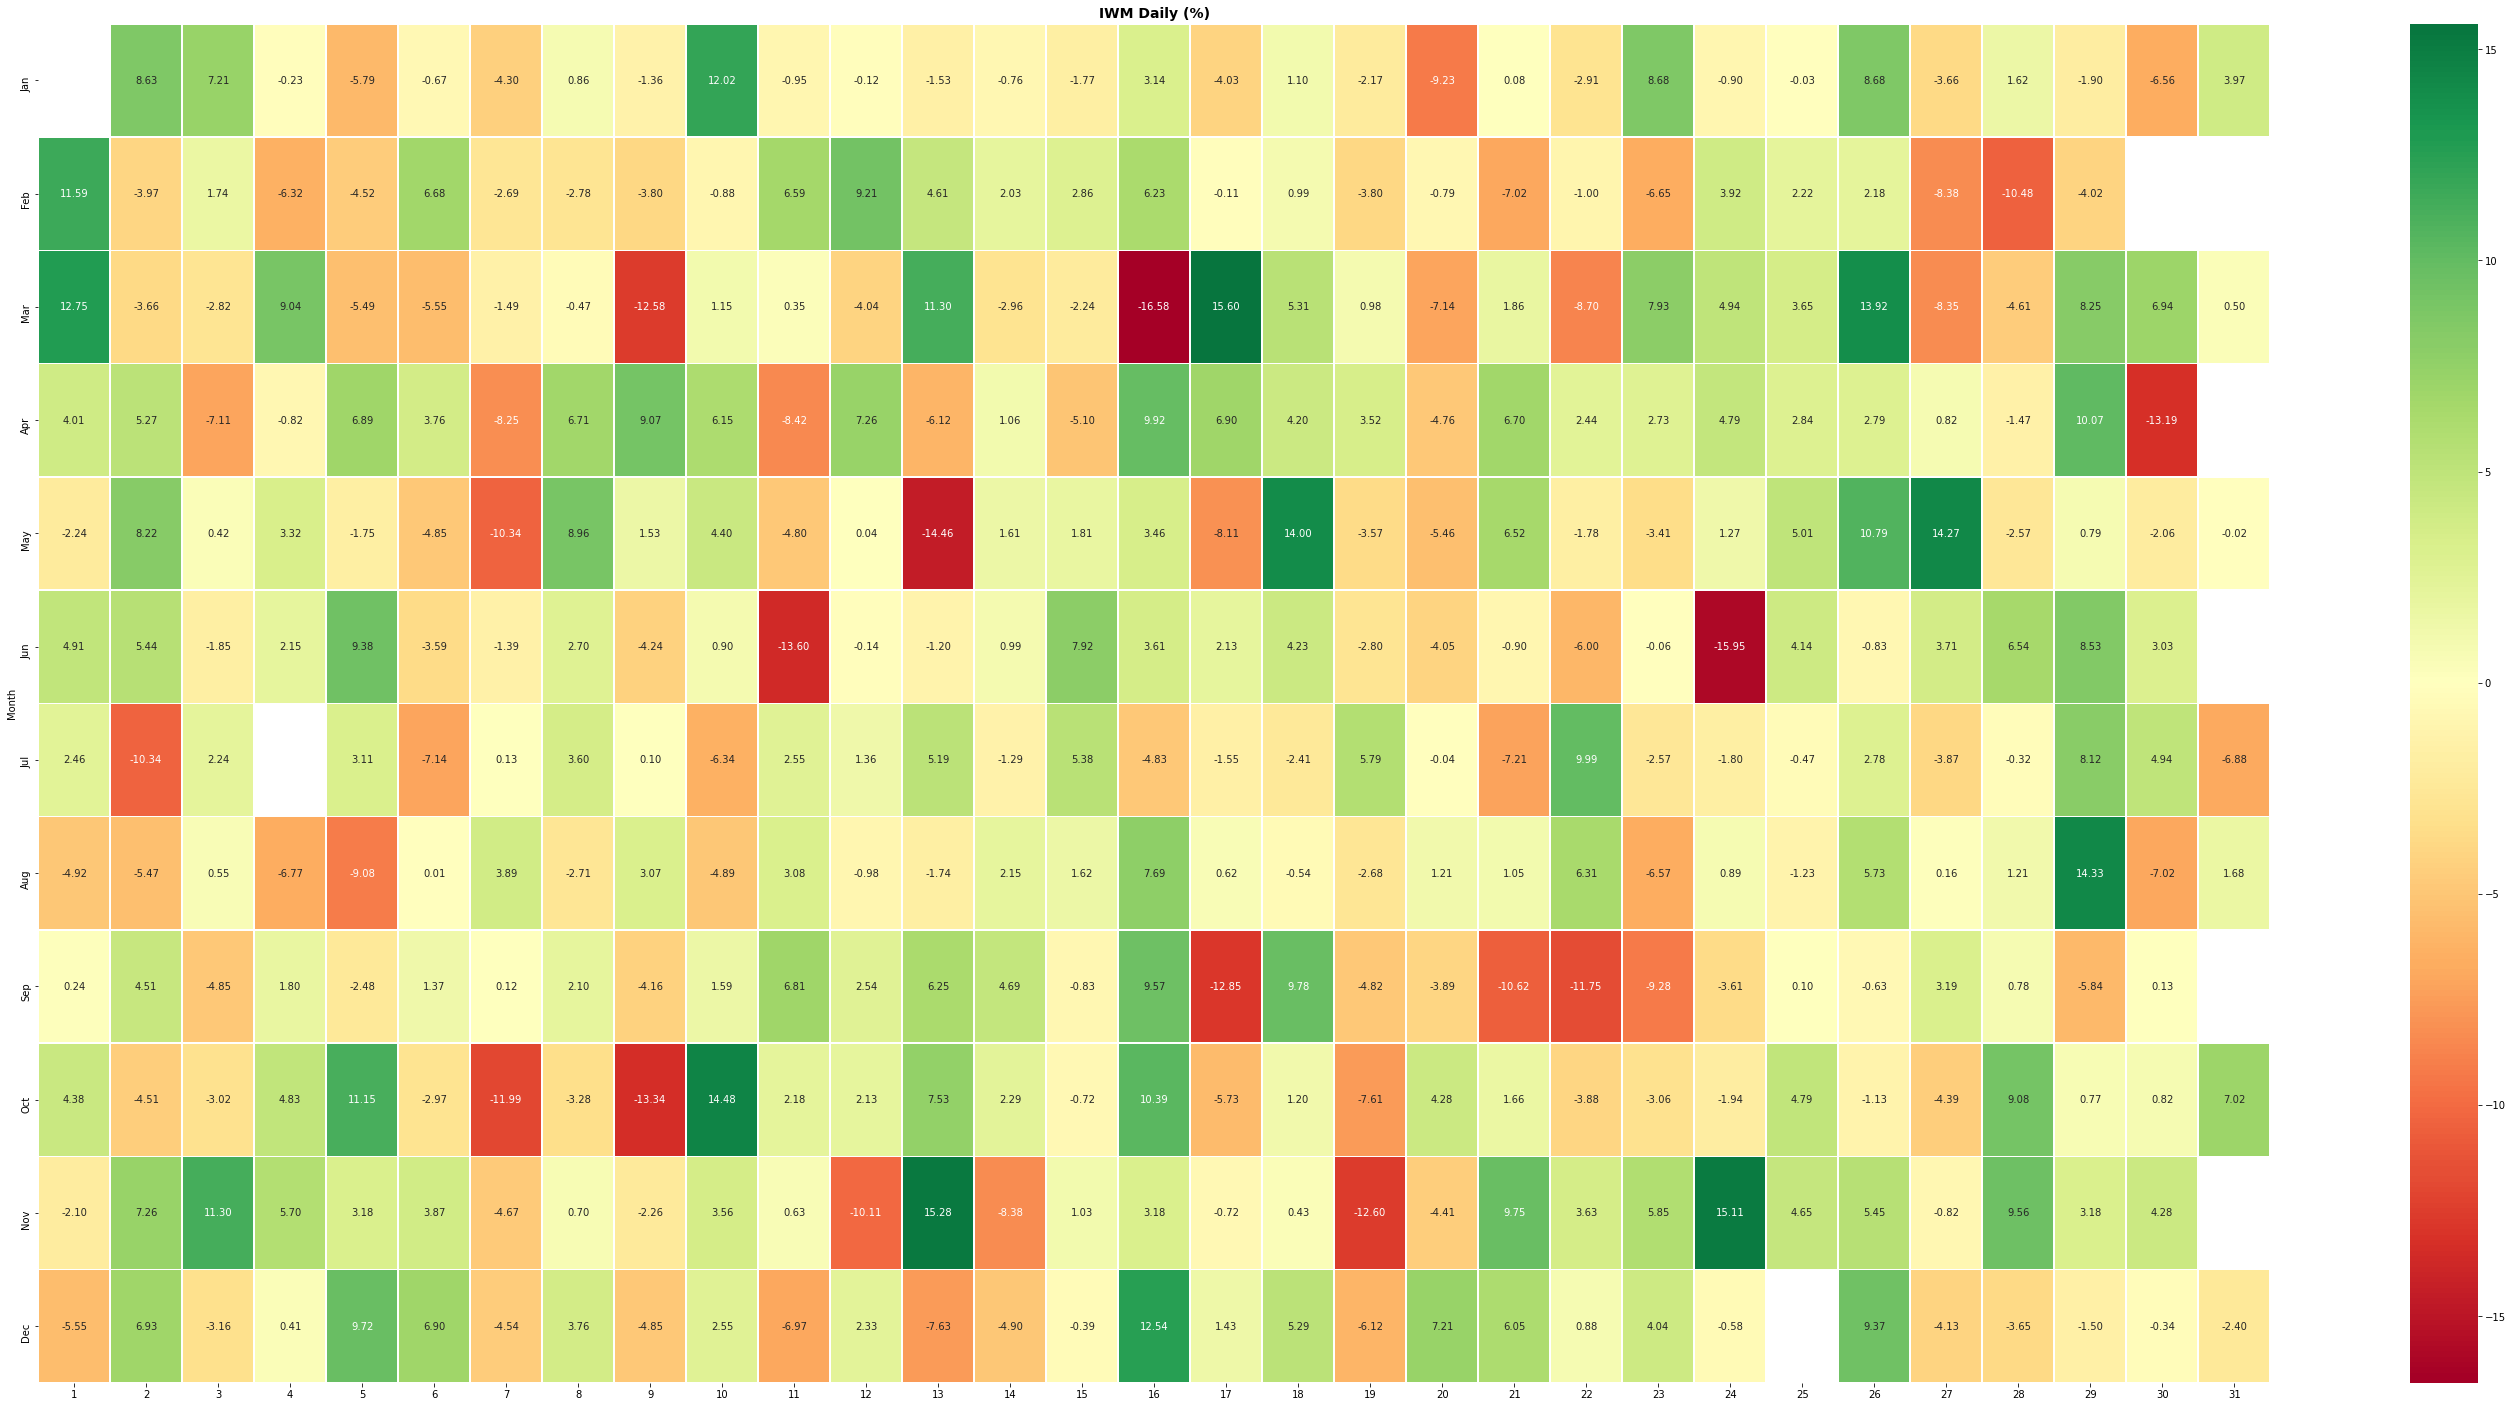

In [23]:
wrh.plot(heat, title="IWM Daily (%)", figsize=(50,25))

In [14]:
data=[]
positive, negative = pos_neg(heat)
spy = pd.DataFrame(data, columns=['MEAN', 'MAX', 'MIN', '#POS', '#NEG', 'SD'])
spy['MEAN'] = round(heat.mean(),2).values
spy['MAX'] = round(heat.max(),2).values
spy['MIN'] = round(heat.min(),2).values
spy['#POS'] = positive.values
spy['#NEG'] = negative.values
spy['SD'] = round(heat.std(),2).values
#iwm.style.set_table_attributes("style='display:inline'").set_caption('IWM Weekly(%)')

#iwm.style.set_caption("IWM Weekly(%)")

In [15]:
#https://stackoverflow.com/questions/33217636/mean-calculation-in-pandas-excluding-zeros
spy_mean = pd.DataFrame(round(heat.mean(),2).values)
spy_mean.index = np.arange(1, len(spy_mean)+1)
spy_mean.round(2).style.format("{:.2}").set_table_attributes("style='display:inline'").set_caption('SPY Daily(%)')


In [29]:
72+73

145

# WAY#0 WEEKLY

# IWM WEEKLY

In [181]:
from pandas_datareader import data
import monthly_returns_heatmap as mrh

prices = data.get_data_yahoo("SPY", start="2000-1-1", end="2020-12-31")['Close']
returns = prices.pct_change()

def sum_returns(returns, groupby, compounded=True):
    def returns_prod(data):
        return (data + 1).prod() - 1
    if compounded:
        return returns.groupby(groupby).apply(returns_prod)
    return returns.groupby(groupby).sum()

returns = prices.pct_change()
returns = pd.DataFrame(sum_returns(returns, 
                       returns.index.strftime('%Y-%V'),False))

a = returns.reset_index()
returns['Week'] = a['Date'].str.slice(5,).values
returns['Year'] = a['Date'].str.slice(0,4).values

returns.columns = ['Returns', 'Week', 'Year']

# make pivot table
returns = returns.pivot('Year', 'Week', 'Returns').fillna(0)

heat = returns*100
heat

Week        01        02        03        04        05        06        07        08         09        10  ...         44        45        46        47         48        49        50        51        52        53
Year                                                                                                       ...                                                                                                      
2000  0.468756  0.863724 -1.718832 -6.010166  4.879563 -2.724875 -2.419888 -1.448923   5.729570 -0.643997  ...   2.501257 -4.349192  0.062753 -1.262501  -1.943062  1.393863 -2.153901  0.095264  0.217750  0.000000
2001 -2.813099  2.172517  1.525070  1.384008 -0.759110 -2.204359 -1.058923 -4.223268  -1.035388 -0.145349  ...  -0.897790  3.147879  1.472459  1.171151  -1.389730  2.211660 -2.945232  1.610729  0.912829  0.000000
2002  3.849231 -2.292948 -1.539696  0.358672 -0.726700 -2.244390  0.743271 -1.071627   3.713463  2.841383  ...   0.115695 -0.635191  1.968842  2.235234   0.655402 -2.078275 -2.906547  0.775208 -2.914749  0.000000
2003  4.965151  1.893125 -2.595413 -4.779435 -0.309206 -3.100030  0.913023  1.243304  -0.291254 -1.851679  ...   1.656454  0.300529 -0.131445 -1.177184   2.136804  0.384576  1.211787  0.712512  0.734451  0.000000
2004 -0.044928  1.048597  1.632874  0.178883 -0.813881  0.862241  0.600185 -0.211205   0.123184  1.183132  ...   2.895928  3.560245  1.285606 -1.149340   0.790468  0.765117  0.073807  0.103046  1.110641  0.085002
2005 -2.018483 -0.160354 -1.227830  0.556247  2.366803  0.455428 -0.311024  0.880913   1.076016 -1.915379  ...   1.917109  1.345903  1.106860  1.589576  -0.211197 -0.408295  0.030891  0.318938 -1.783013  0.000000
2006  3.127454  0.188384 -2.109755  2.026144 -1.768595  0.301279  1.708523  0.467304  -0.493995 -0.123975  ...  -0.995890  1.246055  1.568505 -0.048773  -0.076538  0.857145  0.654291 -1.120189  0.621176  0.000000
2007 -1.501933  1.908433 -0.292686 -0.473175  1.873532 -0.599472  1.242262 -0.294469  -4.577685  1.532778  ...  -1.551631 -4.029665  0.508359 -1.097485   3.180985  1.532388 -2.455083  0.668084 -0.550639  0.000000
2008  0.136480 -0.800168 -5.874653  0.787002  4.845511 -4.724237  1.558251  0.360747  -1.295378 -3.089376  ...  11.419934 -2.754728 -7.554845 -7.880856  12.792955 -1.835276  1.310451 -0.755790 -1.157810  0.000000
2009  3.014186 -4.180046 -4.545951 -2.071051 -0.199071  4.951036 -4.857413 -6.564929  -4.435140 -6.796256  ...  -4.181547  3.409757  2.331201 -0.153775   0.149935  1.318534  0.099540 -0.802498  2.045867 -0.923940
2010  2.786000 -0.800311 -3.919394 -1.664657 -0.612751  1.301637  2.844228 -0.348805   3.136748  1.055510  ...   3.530633 -2.063482  0.098331 -1.218147   3.417662  1.288728 -0.141052  1.043299  0.119622  0.000000
2011  1.106356  1.692146 -0.716535 -0.489526  2.666447  1.488436  1.064569 -1.620831   0.139422 -1.211372  ...  -2.355448  1.037823 -3.733678 -4.690041   7.191635  0.993752 -3.579722  3.930465 -0.691426  0.000000
2012  3.458644  0.886600  2.394073 -0.093353  2.056673 -0.130271  1.524591  0.382212   0.280275  0.208899  ...   0.157871 -2.394460 -1.292884  3.616329   0.570212  0.185250 -0.213009  0.514839 -1.944490  0.000000
2013  3.233219  0.481363  0.855455  1.289261  0.663915  0.382673  0.204292 -0.127512   0.174012  2.172153  ...   0.151135  0.630526  1.550378  0.427039   0.105400 -0.024710 -1.568549  1.935407  1.256358  0.000000
2014 -2.369335  0.683839 -0.254647 -2.593705 -0.382761  0.882792  2.395673 -0.066599   1.299913  1.064522  ...   2.642976  0.833078  0.442303  1.190977   0.252254  0.390804 -3.448321  2.818712  0.927061  0.000000
2015 -0.053518 -0.528598 -1.272981  1.656882 -2.700443  3.036710  2.049099  0.695502  -0.273857 -1.497650  ...   0.210052  1.017539 -3.614451  3.312531   0.119591  0.067922 -3.735773 -0.868179  2.805632 -0.870425
2016 -5.987043 -2.093161  1.463334  1.722984 -2.987051 -0.666109  2.864865  1.623570   2.733000  1.175962  ...  -1.889566  3.735355  0.961309  1.376419  -0.831826  3.

(<Figure size 3600x1800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12450af40>)

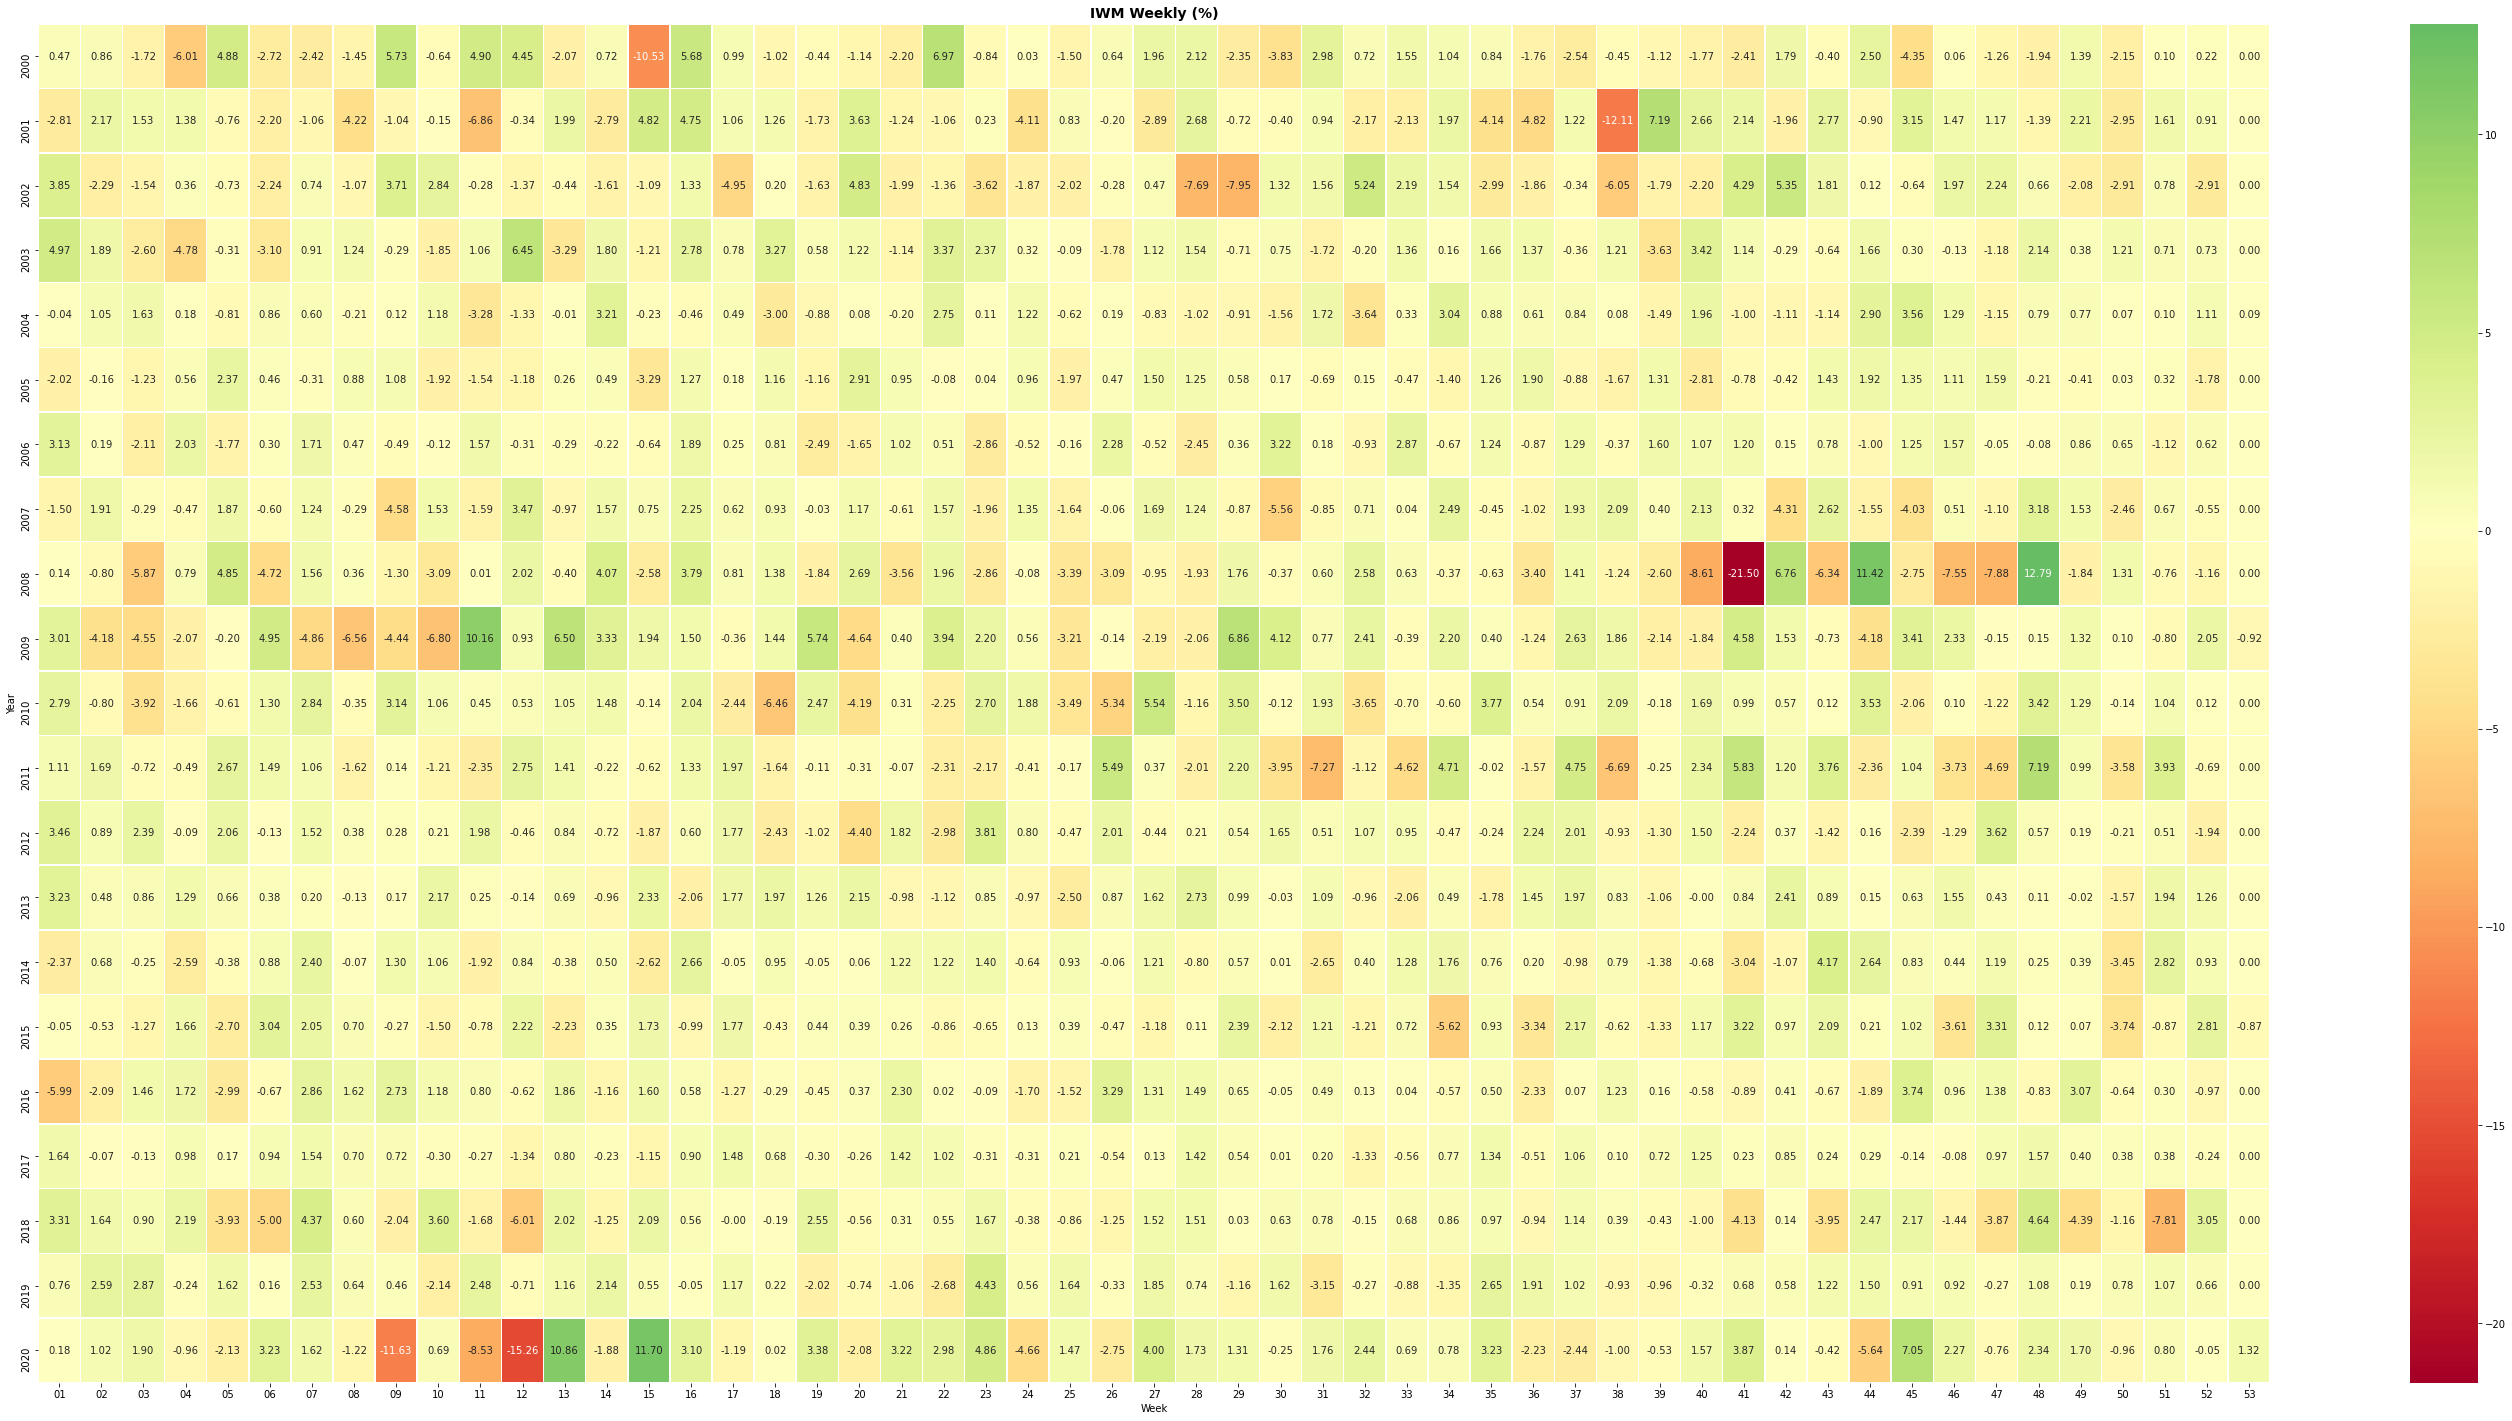

In [182]:
wrh.plot(heat, title="IWM Weekly (%)", figsize=(50,25))

In [183]:
data=[]
positive, negative = pos_neg(heat)
iwm = pd.DataFrame(data, columns=['MEAN', 'MAX', 'MIN', '#POS', '#NEG', 'SD'])
iwm['MEAN'] = round(heat.mean(),2).values
iwm['MAX'] = round(heat.max(),3).values
iwm['MIN'] = round(heat.min(),3).values
iwm['#POS'] = positive.values*1.0
iwm['#NEG'] = negative.values*1.0
iwm['SD'] = round(heat.std(),2).values
#iwm.index = np.arange(1, len(iwm)+1)
#iwm.style.set_table_attributes("style='display:inline'").set_caption('IWM Weekly(%)')

iwm.round(2).style.format("{:.4}").set_table_attributes("style='display:inline'").set_caption('SPY Daily(%)')

#iwm.style.set_caption("IWM Weekly(%)")

In [184]:
#iwm['MEAN']

In [185]:
def assignColor(iwm):
    col = []
    for val in iwm['MEAN'].values:
        if val >= 0.35: #green
            col.append('#06470c')
        elif val <= -0.35: #red
            col.append('#e50000')
        else: #blue
            col.append('#0343df')
    return col
my_colors = [assignColor(iwm)]
#print(colors, " ", iwm['MEAN'])

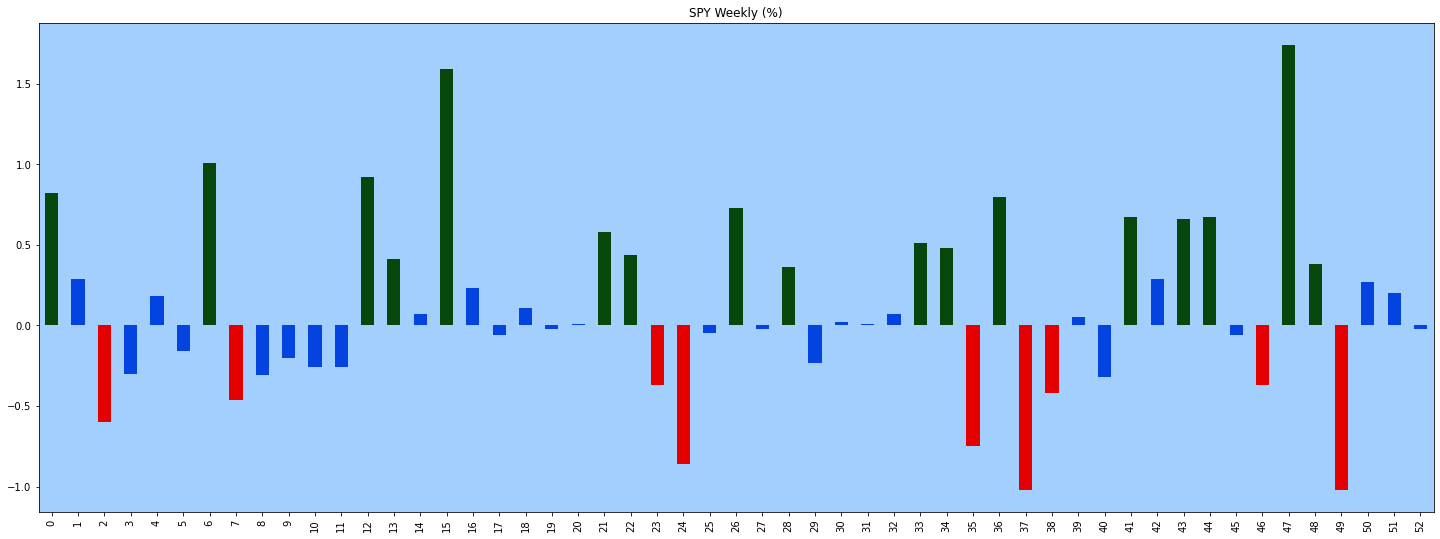

In [190]:
ax = iwm.plot(y=['MEAN'], kind="bar", figsize=(25,9), xticks=iwm.index, title='SPY Weekly (%)',color=my_colors, stacked=True, legend=False)
#{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'}
#{'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
ax.set_facecolor('xkcd:baby blue')

<BarContainer object of 53 artists>

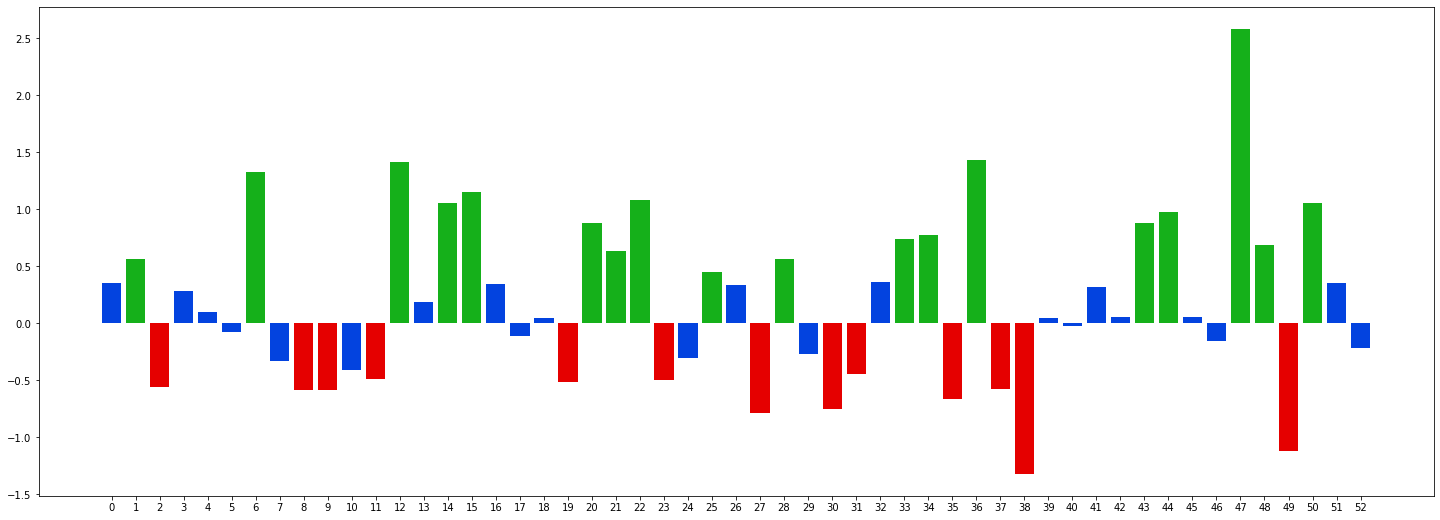

In [169]:
iwm['color']='#0343df'
iwm.loc[iwm['MEAN']>=0.45,'color'] = '#15b01a'
iwm.loc[iwm['MEAN']<=-0.45,'color'] = '#e50000'
plt.figure(figsize=(25,9))
plt.xticks(list(iwm.index))
plt.bar(iwm.index, iwm['MEAN'], color=iwm.color,width=0.8)
#plt.set_axis_bgcolor('xkcd:baby blue')

In [79]:
plt.bar(x=iwm.index, y=iwm['MEAN'], color=colors, figsize=(25,9))
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

In [11]:
mean_iwm = iwm['MEAN']
mean_iwm.index = range(1,54)
mean_iwm

1     0.35
2     0.56
3    -0.56
4     0.28
5     0.10
6    -0.08
7     1.32
8    -0.33
9    -0.59
10   -0.59
11   -0.41
12   -0.49
13    1.41
14    0.18
15    1.05
16    1.15
17    0.34
18   -0.11
19    0.04
20   -0.52
21    0.88
22    0.63
23    1.08
24   -0.50
25   -0.31
26    0.45
27    0.33
28   -0.79
29    0.56
30   -0.27
31   -0.75
32   -0.45
33    0.36
34    0.74
35    0.77
36   -0.67
37    1.43
38   -0.58
39   -1.32
40    0.04
41   -0.03
42    0.32
43    0.05
44    0.88
45    0.97
46    0.05
47   -0.16
48    2.58
49    0.68
50   -1.12
51    1.05
52    0.35
53   -0.22
Name: MEAN, dtype: float64

# QQQ weekly

In [12]:
from pandas_datareader import data
import monthly_returns_heatmap as mrh

prices = data.get_data_yahoo("QQQ", start="2000-1-1", end="2020-12-31")['Close']
returns = prices.pct_change()

def sum_returns(returns, groupby, compounded=True):
    def returns_prod(data):
        return (data + 1).prod() - 1
    if compounded:
        return returns.groupby(groupby).apply(returns_prod)
    return returns.groupby(groupby).sum()

returns = prices.pct_change()
returns = pd.DataFrame(sum_returns(returns, 
                       returns.index.strftime('%Y-%V'),False))

a = returns.reset_index()
returns['Week'] = a['Date'].str.slice(5,).values
returns['Year'] = a['Date'].str.slice(0,4).values

returns.columns = ['Returns', 'Week', 'Year']

# make pivot table
returns = returns.pivot('Year', 'Week', 'Returns').fillna(0)

heat = returns*100
heat

Week        01         02        03         04         05        06        07        08         09        10  ...         44         45        46        47        48        49        50        51        52        53
Year                                                                                                          ...                                                                                                      
2000 -3.909148   4.067572  3.071739 -10.904140  12.402185  2.998711 -1.356939  5.756622   6.728409  3.123340  ...   4.397200 -14.174107  1.835922 -2.990903 -9.306111  6.560312 -5.540019 -4.652162 -3.438588  0.000000
2001 -4.584157  10.428917  5.686497  -1.043552  -6.030404 -8.594122 -1.964156 -7.311519  -8.766440 -3.120653  ...  -0.868281   5.942075  4.323684 -0.053067  1.084104  5.395315 -3.838780 -1.437080  2.141783  0.000000
2002  5.138014  -1.964385 -5.524844   0.714917  -1.743618 -5.167245 -1.012740 -5.962388   6.294060  7.993114  ...   2.308506  -0.589581  5.473210  4.905218  0.114222 -4.524517 -5.373427  1.199877 -1.960039  0.000000
2003  7.030401   5.518683 -6.722017  -1.884109  -1.485500 -2.587488  2.857928  2.791926   0.037785 -2.471695  ...   2.882507   1.294895 -1.617665 -2.291753  3.343338 -0.925744  0.621064  0.648805  1.097409  0.000000
2004 -0.274269   3.730223  2.225495  -1.459180  -2.451679  0.192416 -0.499795 -0.195121  -0.780839  0.185719  ...   3.062738   2.841260  1.841434  0.076835  1.369822  2.340899 -0.480230 -1.141221  0.741936  0.407360
2005 -3.465244  -0.292550 -3.618506  -0.331947   2.251732 -0.107138 -0.919254  0.737627  -0.249288 -0.917050  ...   4.521077   1.566042  1.813672  1.057381  0.546279 -0.923675 -0.329627 -0.417973 -2.411395  0.000000
2006  5.512301   0.705402 -4.051412   2.076773  -2.842405  0.112092  0.629643  0.136011   0.487654 -2.161296  ...  -0.653493   2.605646  2.921229  0.789401 -2.209674  0.567977  1.208914 -3.420345  0.537720  0.000000
2007  0.447272   3.290059 -2.527322  -1.338910   1.350946 -0.623549  1.891519  1.227915  -6.238034  1.073555  ...   0.936236  -8.328148  0.688021 -0.858655  2.990730  1.998934 -2.594281  1.780197 -0.046520  0.000000
2008 -3.449750  -2.751565 -3.610680  -2.968268   3.595441 -4.383346  0.551501 -0.313518  -1.645579 -2.040360  ...  11.507010  -5.002632 -6.905368 -7.930132  9.057582 -0.106846  2.659879  0.757104 -2.449377  0.000000
2009  4.337596  -3.065527 -2.101646  -1.557652   0.665993  7.725981 -2.962370 -5.169004  -4.590167 -4.433270  ...  -5.073819   3.959024  3.286139 -1.282853  0.186983  1.399904  0.032731  0.769209  3.376607 -0.494643
2010  1.749356  -1.491902 -3.684246  -3.098701   0.500814  1.818149  2.427427 -0.141796   3.707406  1.967439  ...   2.829710  -2.166799 -0.048555  0.608602  2.097986  1.147305  0.059845  0.404888 -0.511451  0.000000
2011  2.572344   2.008451 -2.330648   0.135331   2.938100  1.836617  0.497740 -1.798939   0.588872 -2.559701  ...  -1.878173   0.176380 -4.274609 -4.607538  6.964262  0.737354 -3.836408  2.265076 -0.436666  0.000000
2012  5.624676   0.642813  2.711133   1.057583   2.708333  0.681294  1.541883  0.836322   1.422113  0.250755  ...  -0.258314  -2.662206 -1.786661  4.128010  1.384321 -1.320691 -0.353541  0.819441 -2.193135  0.000000
2013  2.832044   0.943862 -0.278465  -0.091584   0.987904  0.518478 -0.351696 -0.879055   0.371504  2.054452  ...  -0.108171  -0.299482  1.713939  0.047802  2.056361  0.317654 -1.336619  1.937195  1.178658  0.000000
2014 -3.217616   0.765149  0.696111  -1.282316  -0.515571  1.240425  2.845774  0.138279   0.456721  0.222520  ...   2.801545   0.198575  1.584587  0.633194  2.045641 -0.588630 -2.582671  1.657585  0.691294  0.000000
2015 -0.300240  -0.262909 -1.747277   3.376697  -3.034571  2.001984  3.623261  1.396884  -0.006579 -0.904968  ...   0.491286   1.287371 -4.377582  4.168307 -0.148022  0.772103 -3.810646 -0.818973  2.492934 -0.626324
2016 -7.195279  -2.955632  2.906064   0.424410  -5.857867 -0.077371  3.674033  1.791795   2.197292  0.795643  ..

(<Figure size 3600x1800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11c0aecd0>)

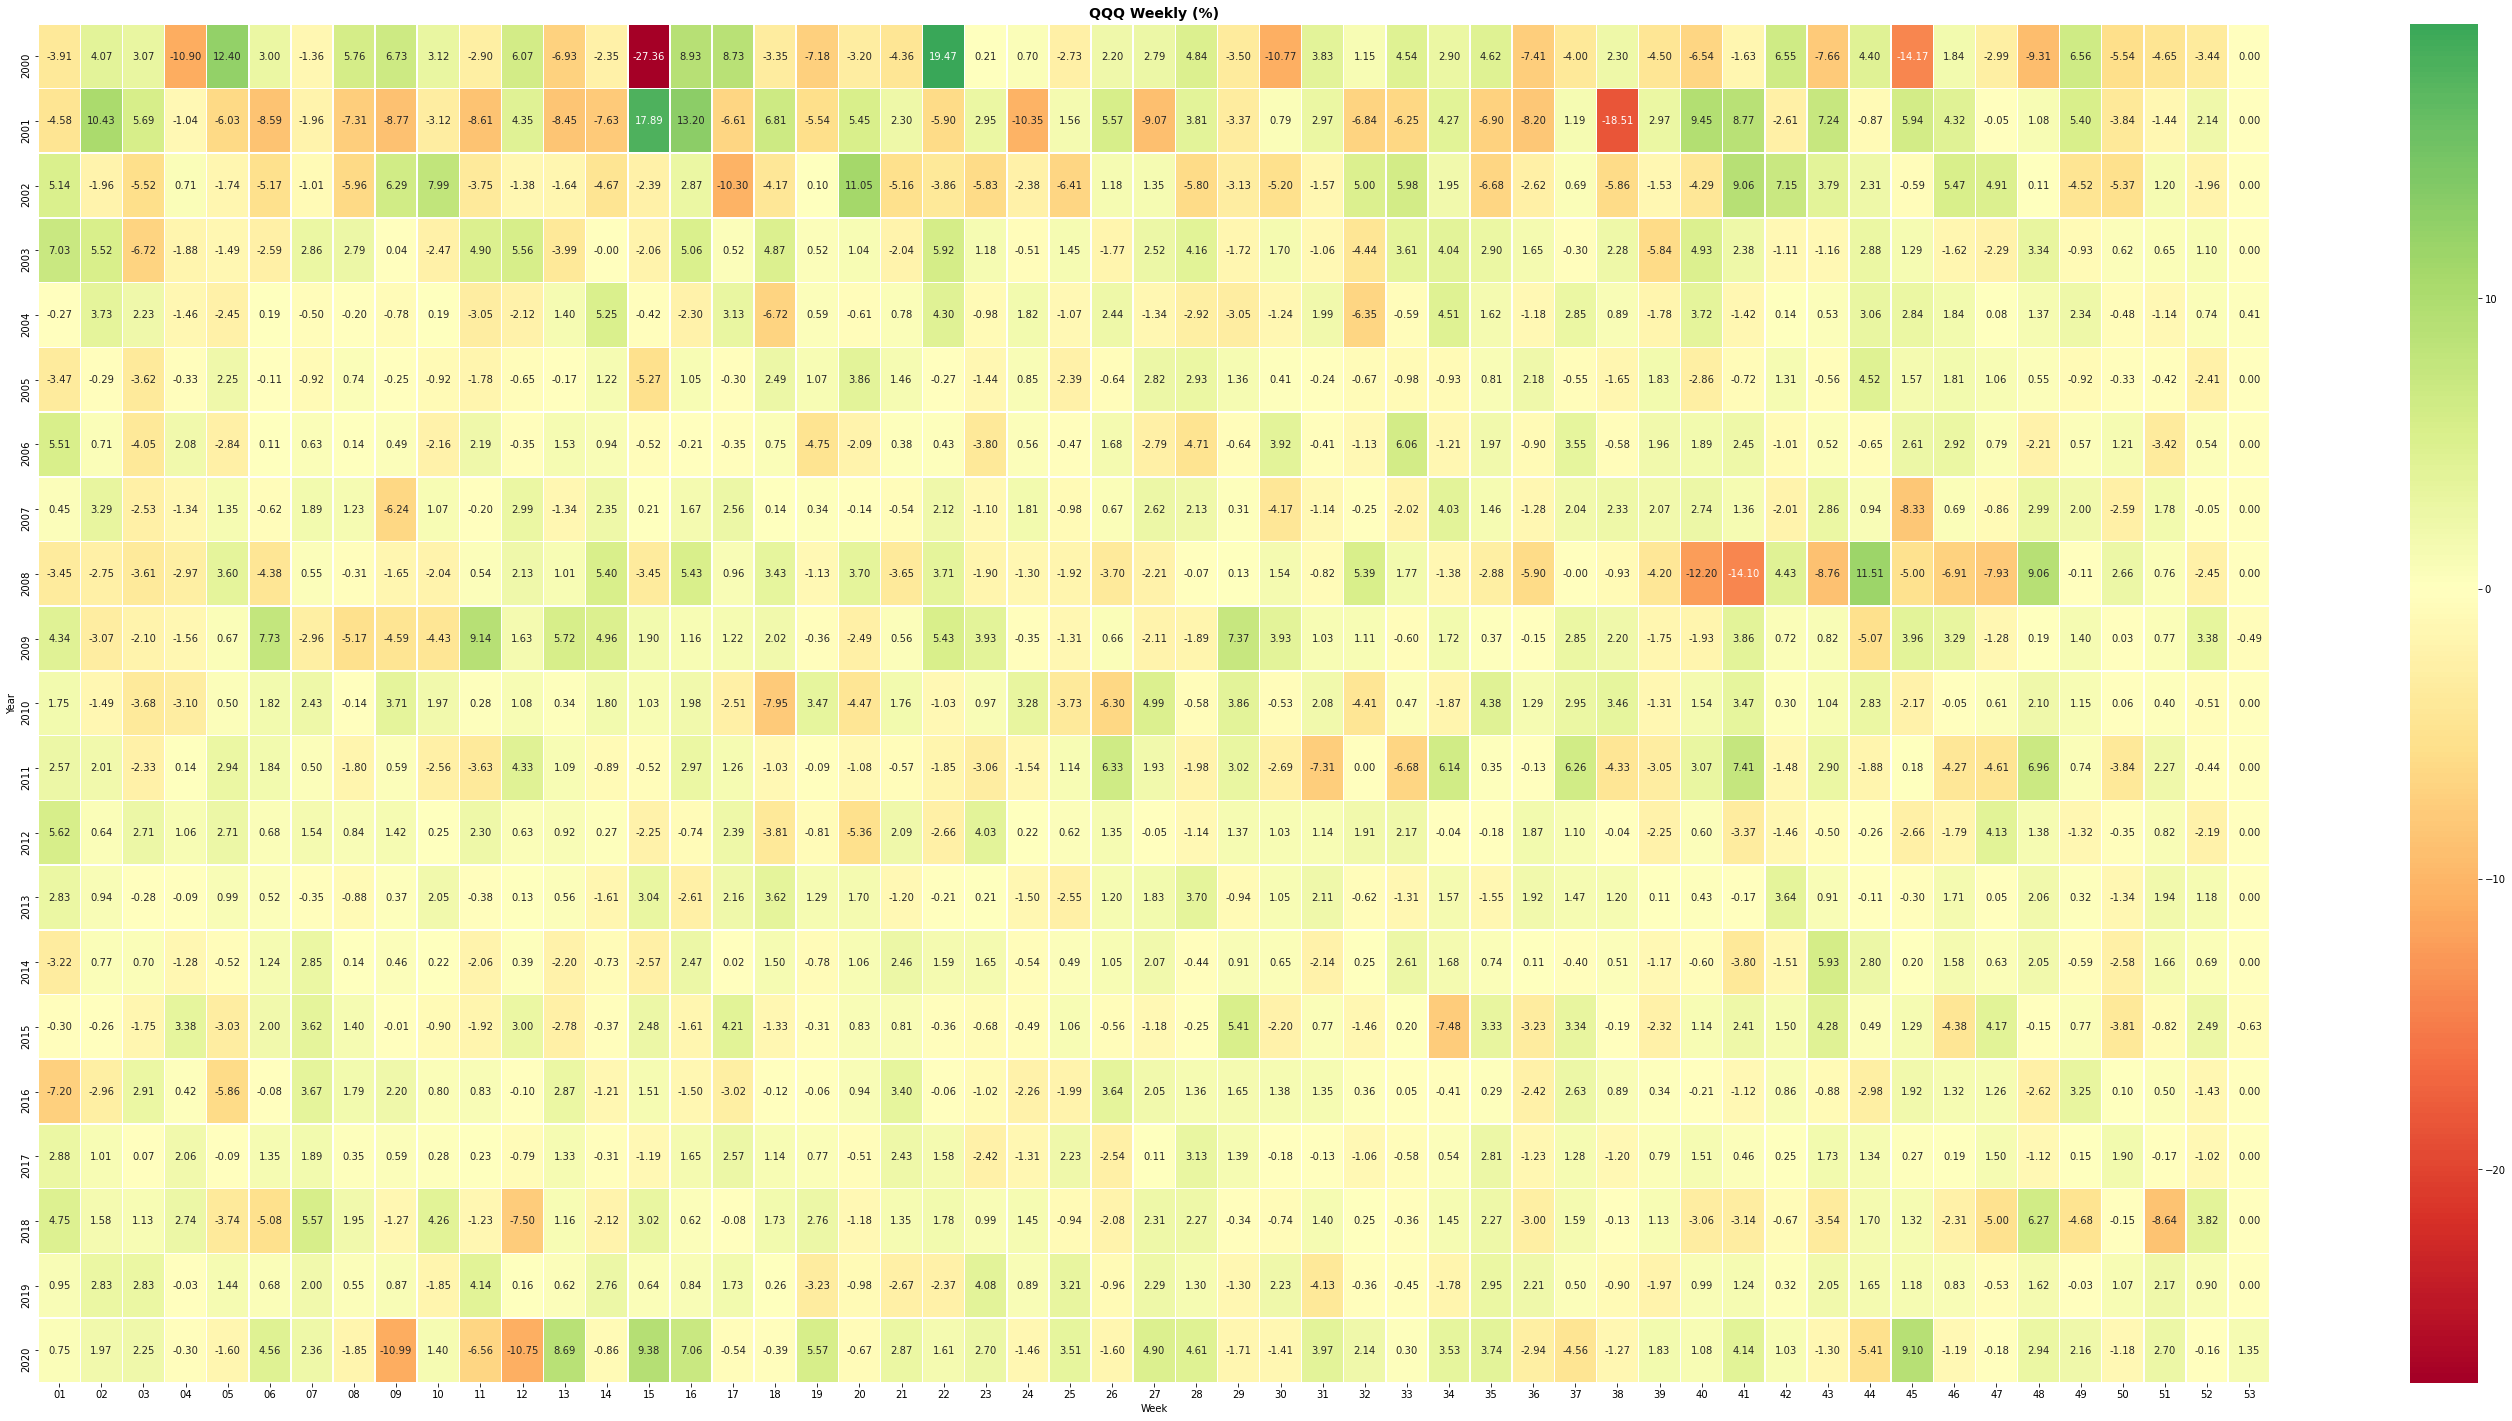

In [13]:
wrh.plot(heat, title="QQQ Weekly (%)", figsize=(50,25))

In [14]:
import numpy as np
poss, negs = [], []
pos, neg = 0, 0
for c in heat.columns:
    for i in heat[c]:
        if i > 0:
            pos+=1
        elif i < 0: 
            neg+=1
    #print(c)
    poss.append(pos)
    negs.append(neg)
    #print("Num POS: ", pos)
    #print("NUM NEG: ", neg)
    #print("\n")
    pos=0
    neg=0
    
positive = pd.Series(poss)
negative = pd.Series(negs)

In [15]:
data=[]
qqq = pd.DataFrame(data, columns=['MEAN', 'MAX', 'MIN', '#POS', '#NEG', 'SD'])
qqq['MEAN'] = round(heat.mean(),2).values
qqq['MAX'] = round(heat.max(),2).values
qqq['MIN'] = round(heat.min(),2).values
qqq['#POS'] = positive.values
qqq['#NEG'] = negative.values
qqq['SD'] = round(heat.std(),2).values
qqq.style.set_table_attributes("style='display:inline'").set_caption('QQQ Weekly(%)')

#qqq.style.set_caption("IWM Weekly(%)")

In [16]:
qqq.index

RangeIndex(start=0, stop=53, step=1)

In [ ]:
x = np.arange(10)
y = np.arange(10) * 0.1

col = []
for val in y:
    if val < 0.4:
        col.append('blue')
    elif val >= 0.7:
        col.append('green')
    else:
        col.append('red')

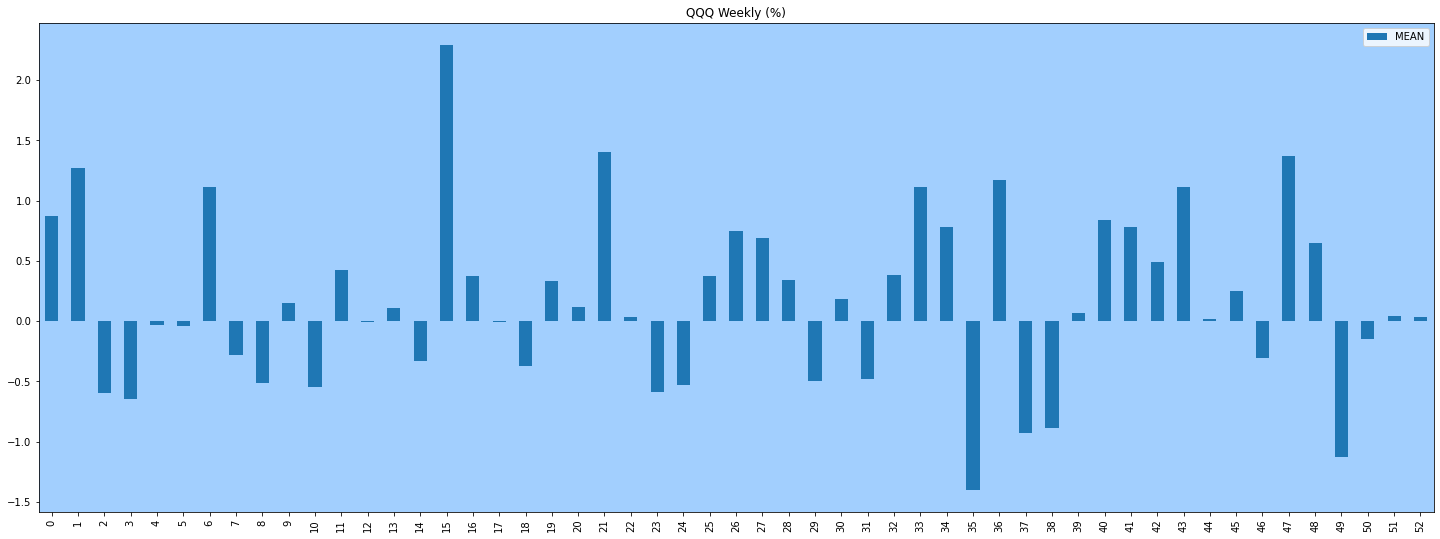

In [17]:
ax = qqq.plot(y=['MEAN'], kind="bar", figsize=(25,9), xticks=qqq.index, title='QQQ Weekly (%)')
ax.set_facecolor('xkcd:baby blue')

In [18]:
mean_qqq = qqq['MEAN']
mean_qqq.index = range(1,54)
mean_qqq

1     0.87
2     1.27
3    -0.60
4    -0.65
5    -0.03
6    -0.04
7     1.11
8    -0.28
9    -0.51
10    0.15
11   -0.55
12    0.42
13   -0.01
14    0.11
15   -0.33
16    2.29
17    0.37
18   -0.01
19   -0.37
20    0.33
21    0.12
22    1.40
23    0.03
24   -0.59
25   -0.53
26    0.37
27    0.75
28    0.69
29    0.34
30   -0.50
31    0.18
32   -0.48
33    0.38
34    1.11
35    0.78
36   -1.40
37    1.17
38   -0.93
39   -0.89
40    0.07
41    0.84
42    0.78
43    0.49
44    1.11
45    0.02
46    0.25
47   -0.31
48    1.37
49    0.65
50   -1.13
51   -0.15
52    0.04
53    0.03
Name: MEAN, dtype: float64

# SPY WEEKLY

In [19]:
from pandas_datareader import data
import monthly_returns_heatmap as mrh

prices = data.get_data_yahoo("SPY", start="2000-1-1", end="2020-12-31")['Close']
returns = prices.pct_change()

def sum_returns(returns, groupby, compounded=True):
    def returns_prod(data):
        return (data + 1).prod() - 1
    if compounded:
        return returns.groupby(groupby).apply(returns_prod)
    return returns.groupby(groupby).sum()

returns = prices.pct_change()
returns = pd.DataFrame(sum_returns(returns, 
                       returns.index.strftime('%Y-%V'),False))

a = returns.reset_index()
returns['Week'] = a['Date'].str.slice(5,).values
returns['Year'] = a['Date'].str.slice(0,4).values

returns.columns = ['Returns', 'Week', 'Year']

# make pivot table
returns = returns.pivot('Year', 'Week', 'Returns').fillna(0)

heat = returns*100
heat

Week        01        02        03        04        05        06        07        08         09        10  ...         44        45        46        47         48        49        50        51        52        53
Year                                                                                                       ...                                                                                                      
2000  0.468756  0.863724 -1.718832 -6.010166  4.879563 -2.724875 -2.419888 -1.448923   5.729570 -0.643997  ...   2.501257 -4.349192  0.062753 -1.262501  -1.943062  1.393863 -2.153901  0.095264  0.217750  0.000000
2001 -2.813099  2.172517  1.525070  1.384008 -0.759110 -2.204359 -1.058923 -4.223268  -1.035388 -0.145349  ...  -0.897790  3.147879  1.472459  1.171151  -1.389730  2.211660 -2.945232  1.610729  0.912829  0.000000
2002  3.849231 -2.292948 -1.539696  0.358672 -0.726700 -2.244390  0.743271 -1.071627   3.713463  2.841383  ...   0.115695 -0.635191  1.968842  2.235234   0.655402 -2.078275 -2.906547  0.775208 -2.914749  0.000000
2003  4.965151  1.893125 -2.595413 -4.779435 -0.309206 -3.100030  0.913023  1.243304  -0.291254 -1.851679  ...   1.656454  0.300529 -0.131445 -1.177184   2.136804  0.384576  1.211787  0.712512  0.734451  0.000000
2004 -0.044928  1.048597  1.632874  0.178883 -0.813881  0.862241  0.600185 -0.211205   0.123184  1.183132  ...   2.895928  3.560245  1.285606 -1.149340   0.790468  0.765117  0.073807  0.103046  1.110641  0.085002
2005 -2.018483 -0.160354 -1.227830  0.556247  2.366803  0.455428 -0.311024  0.880913   1.076016 -1.915379  ...   1.917109  1.345903  1.106860  1.589576  -0.211197 -0.408295  0.030891  0.318938 -1.783013  0.000000
2006  3.127454  0.188384 -2.109755  2.026144 -1.768595  0.301279  1.708523  0.467304  -0.493995 -0.123975  ...  -0.995890  1.246055  1.568505 -0.048773  -0.076538  0.857145  0.654291 -1.120189  0.621176  0.000000
2007 -1.501933  1.908433 -0.292686 -0.473175  1.873532 -0.599472  1.242262 -0.294469  -4.577685  1.532778  ...  -1.551631 -4.029665  0.508359 -1.097485   3.180985  1.532388 -2.455083  0.668084 -0.550639  0.000000
2008  0.136480 -0.800168 -5.874653  0.787002  4.845511 -4.724237  1.558251  0.360747  -1.295378 -3.089376  ...  11.419934 -2.754728 -7.554845 -7.880856  12.792955 -1.835276  1.310451 -0.755790 -1.157810  0.000000
2009  3.014186 -4.180046 -4.545951 -2.071051 -0.199071  4.951036 -4.857413 -6.564929  -4.435140 -6.796256  ...  -4.181547  3.409757  2.331201 -0.153775   0.149935  1.318534  0.099540 -0.802498  2.045867 -0.923940
2010  2.786000 -0.800311 -3.919394 -1.664657 -0.612751  1.301637  2.844228 -0.348805   3.136748  1.055510  ...   3.530633 -2.063482  0.098331 -1.218147   3.417662  1.288728 -0.141052  1.043299  0.119622  0.000000
2011  1.106356  1.692146 -0.716535 -0.489526  2.666447  1.488436  1.064569 -1.620831   0.139422 -1.211372  ...  -2.355448  1.037823 -3.733678 -4.690041   7.191635  0.993752 -3.579722  3.930465 -0.691426  0.000000
2012  3.458644  0.886600  2.394073 -0.093353  2.056673 -0.130271  1.524591  0.382212   0.280275  0.208899  ...   0.157871 -2.394460 -1.292884  3.616329   0.570212  0.185250 -0.213009  0.514839 -1.944490  0.000000
2013  3.233219  0.481363  0.855455  1.289261  0.663915  0.382673  0.204292 -0.127512   0.174012  2.172153  ...   0.151135  0.630526  1.550378  0.427039   0.105400 -0.024710 -1.568549  1.935407  1.256358  0.000000
2014 -2.369335  0.683839 -0.254647 -2.593705 -0.382761  0.882792  2.395673 -0.066599   1.299913  1.064522  ...   2.642976  0.833078  0.442303  1.190977   0.252254  0.390804 -3.448321  2.818712  0.927061  0.000000
2015 -0.053518 -0.528598 -1.272981  1.656882 -2.700443  3.036710  2.049099  0.695502  -0.273857 -1.497650  ...   0.210052  1.017539 -3.614451  3.312531   0.119591  0.067922 -3.735773 -0.868179  2.805632 -0.870425
2016 -5.987043 -2.093161  1.463334  1.722984 -2.987051 -0.666109  2.864865  1.623570   2.733000  1.175962  ...  -1.889566  3.735355  0.961309  1.376419  -0.831826  3.

(<Figure size 3600x1800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11c596d60>)

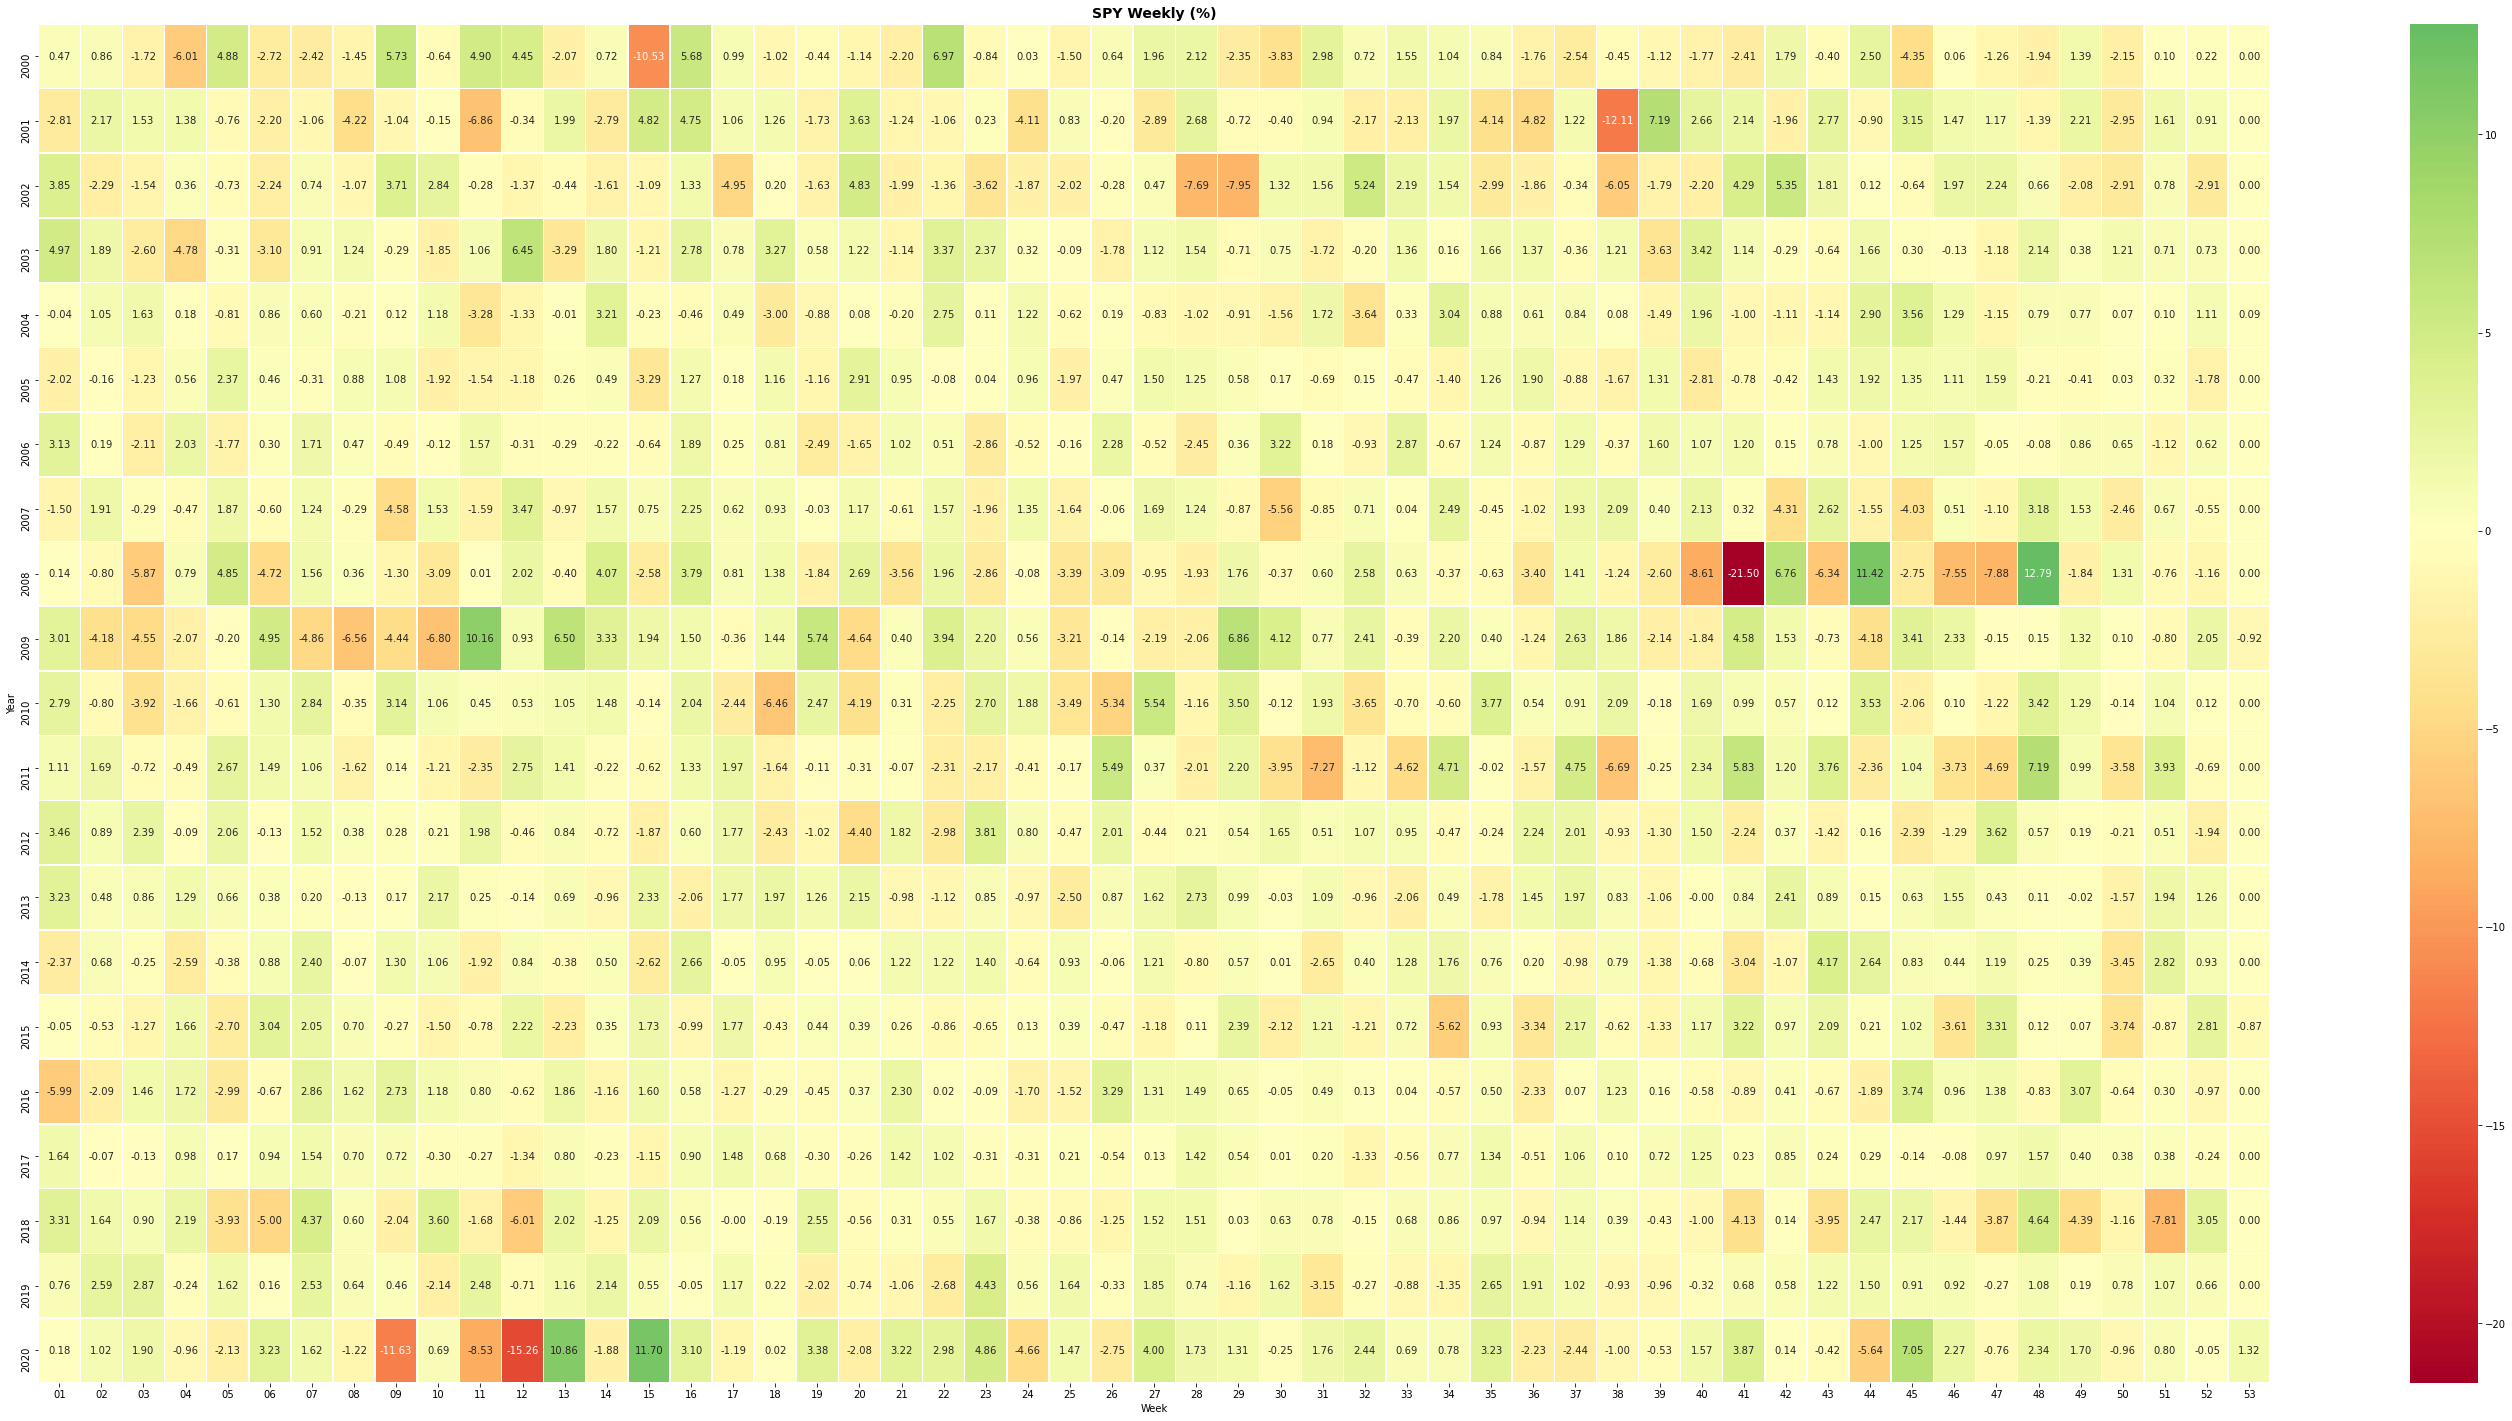

In [20]:
wrh.plot(heat, title="SPY Weekly (%)", figsize=(50,25))

In [21]:
import numpy as np
poss, negs = [], []
pos, neg = 0, 0
for c in heat.columns:
    for i in heat[c]:
        if i > 0:
            pos+=1
        elif i < 0: 
            neg+=1
    #print(c)
    poss.append(pos)
    negs.append(neg)
    #print("Num POS: ", pos)
    #print("NUM NEG: ", neg)
    #print("\n")
    pos=0
    neg=0
    
positive = pd.Series(poss)
negative = pd.Series(negs)

In [22]:
data=[]
spy = pd.DataFrame(data, columns=['MEAN', 'MAX', 'MIN', '#POS', '#NEG', 'SD'])
spy['MEAN'] = round(heat.mean(),2).values
spy['MAX'] = round(heat.max(),2).values
spy['MIN'] = round(heat.min(),2).values
spy['#POS'] = positive.values
spy['#NEG'] = negative.values
spy['SD'] = round(heat.std(),2).values
spy.style.set_table_attributes("style='display:inline'").set_caption('SPY Weekly(%)')

#spy.style.set_caption("IWM Weekly(%)")

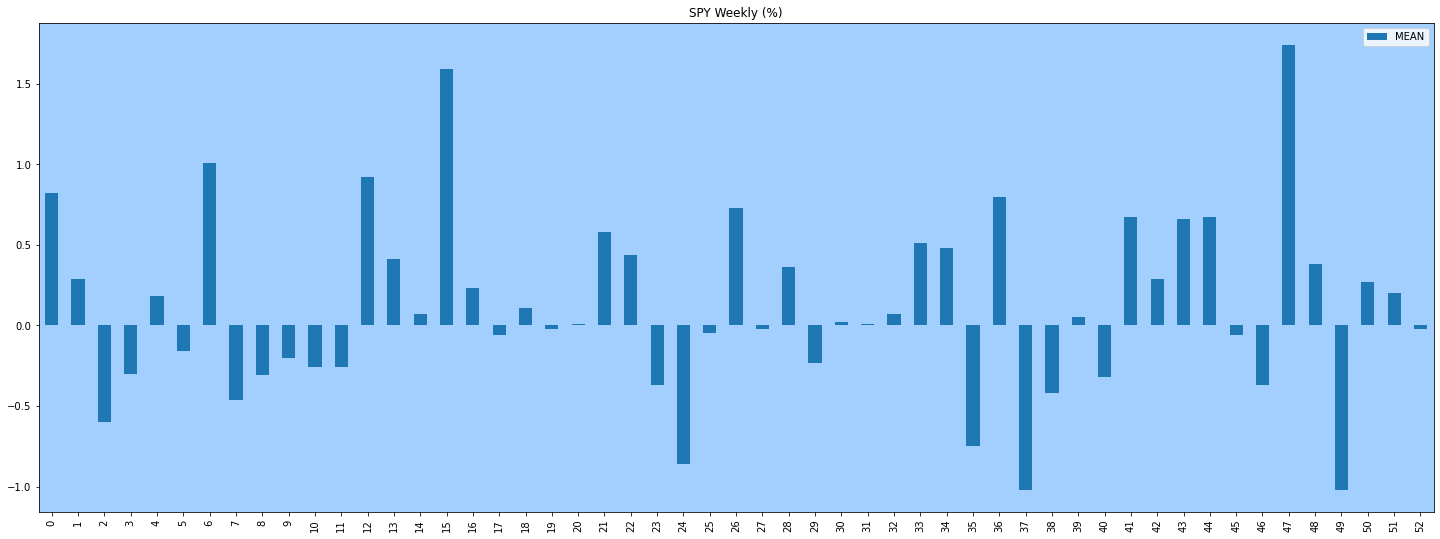

In [23]:
ax = spy.plot(y=['MEAN'], kind="bar", figsize=(25,9), xticks=spy.index, title='SPY Weekly (%)')
ax.set_facecolor('xkcd:baby blue')

In [24]:
mean_spy = spy['MEAN']
mean_spy.index = range(1,54)
mean_spy

1     0.82
2     0.29
3    -0.60
4    -0.30
5     0.18
6    -0.16
7     1.01
8    -0.46
9    -0.31
10   -0.20
11   -0.26
12   -0.26
13    0.92
14    0.41
15    0.07
16    1.59
17    0.23
18   -0.06
19    0.11
20   -0.02
21    0.01
22    0.58
23    0.44
24   -0.37
25   -0.86
26   -0.05
27    0.73
28   -0.02
29    0.36
30   -0.23
31    0.02
32    0.01
33    0.07
34    0.51
35    0.48
36   -0.75
37    0.80
38   -1.02
39   -0.42
40    0.05
41   -0.32
42    0.67
43    0.29
44    0.66
45    0.67
46   -0.06
47   -0.37
48    1.74
49    0.38
50   -1.02
51    0.27
52    0.20
53   -0.02
Name: MEAN, dtype: float64

In [25]:
#TIME NOW:
my_date = datetime.date.today()
year, week_num, day_of_week = my_date.isocalendar()
print("Week #" + str(week_num) + " of year " + str(year))

AttributeError: 'method_descriptor' object has no attribute 'today'

In [ ]:
#TIME NOW:
my_date = datetime.date.today()
year, week_num, day_of_week = my_date.isocalendar()
print("Week #" + str(week_num) + " of year " + str(year))

In [ ]:
from datetime import date, time, datetime
custom = date(year=2021, month=4, day=12)
year, week_num, day_of_week = custom.isocalendar()
print("Week #" + str(week_num) + " of year " + str(year))

In [3]:
from pandas_datareader import data
import monthly_returns_heatmap as mrh

prices = data.get_data_yahoo("SPY", start="2000-1-1", end="2020-12-31")['Close']
returns = prices.pct_change()
#mrh.plot(returns, title="SPY Monthly (%)", figsize=(15,10))

In [4]:
prices.pct_change().index.strftime('%m')

Index(['01', '01', '01', '01', '01', '01', '01', '01', '01', '01',
       ...
       '12', '12', '12', '12', '12', '12', '12', '12', '12', '12'],
      dtype='object', name='Date', length=5284)

In [5]:
prices.pct_change()[prices.pct_change().index.strftime('%m') == '01']

Date
2000-01-03         NaN
2000-01-04   -0.039106
2000-01-05    0.001789
2000-01-06   -0.016071
2000-01-07    0.058076
                ...   
2020-01-27   -0.016029
2020-01-28    0.010479
2020-01-29   -0.000826
2020-01-30    0.003245
2020-01-31   -0.018158
Name: Close, Length: 427, dtype: float64

In [6]:
prices.pct_change().index.strftime('%V')

Index(['01', '01', '01', '01', '01', '02', '02', '02', '02', '02',
       ...
       '51', '51', '52', '52', '52', '52', '53', '53', '53', '53'],
      dtype='object', name='Date', length=5284)

In [7]:
prices.pct_change()[prices.pct_change().index.strftime('%m') == '01'].sum()

-0.0030383520514557505

In [8]:
prices.pct_change()[prices.pct_change().index.strftime('%V') == '01'].sum()

0.17244315860100967

In [9]:
prices.pct_change()[prices.pct_change().index.strftime('%V') == '01']

Date
2000-01-03         NaN
2000-01-04   -0.039106
2000-01-05    0.001789
2000-01-06   -0.016071
2000-01-07    0.058076
                ...   
2019-01-04    0.033496
2019-12-30   -0.005513
2019-12-31    0.002429
2020-01-02    0.009352
2020-01-03   -0.007572
Name: Close, Length: 88, dtype: float64

In [13]:
def sum_returns(returns, groupby, compounded=True):
    def returns_prod(data):
        return (data + 1).prod() - 1
    if compounded:
        return returns.groupby(groupby).apply(returns_prod)
    return returns.groupby(groupby).sum()

In [14]:
returns = prices.pct_change()
returns = pd.DataFrame(sum_returns(returns, 
                       returns.index.strftime('%Y-%V'),
                                       False))

returns

Close
Date             
2000-01  0.004688
2000-02  0.008637
2000-03 -0.017188
2000-04 -0.060102
2000-05  0.048796
...           ...
2020-49  0.016959
2020-50 -0.009597
2020-51  0.007983
2020-52 -0.000472
2020-53  0.013191

[1096 rows x 1 columns]

In [15]:
returns.index[0][5:]

'01'

In [16]:
returns.index[5:]

Index(['2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11',
       '2000-12', '2000-13', '2000-14', '2000-15',
       ...
       '2020-44', '2020-45', '2020-46', '2020-47', '2020-48', '2020-49',
       '2020-50', '2020-51', '2020-52', '2020-53'],
      dtype='object', name='Date', length=1091)

In [17]:
returns

Close
Date             
2000-01  0.004688
2000-02  0.008637
2000-03 -0.017188
2000-04 -0.060102
2000-05  0.048796
...           ...
2020-49  0.016959
2020-50 -0.009597
2020-51  0.007983
2020-52 -0.000472
2020-53  0.013191

[1096 rows x 1 columns]

In [18]:
returns.index

Index(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
       '2000-07', '2000-08', '2000-09', '2000-10',
       ...
       '2020-44', '2020-45', '2020-46', '2020-47', '2020-48', '2020-49',
       '2020-50', '2020-51', '2020-52', '2020-53'],
      dtype='object', name='Date', length=1096)

In [21]:
a = returns.reset_index()
returns['Week'] = a['Date'].str.slice(5,).values
returns['Year'] = a['Date'].str.slice(0,4).values
returns

Close Week  Year
Date                        
2000-01  0.004688   01  2000
2000-02  0.008637   02  2000
2000-03 -0.017188   03  2000
2000-04 -0.060102   04  2000
2000-05  0.048796   05  2000
...           ...  ...   ...
2020-49  0.016959   49  2020
2020-50 -0.009597   50  2020
2020-51  0.007983   51  2020
2020-52 -0.000472   52  2020
2020-53  0.013191   53  2020

[1096 rows x 3 columns]

In [22]:
#returns.index = pd.to_datetime(returns.index)

In [23]:
pd.to_datetime(prices.pct_change().index)

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=5284, freq=None)

In [24]:
prices.pct_change().index.strftime('%Y')

Index(['2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000',
       '2000',
       ...
       '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020',
       '2020'],
      dtype='object', name='Date', length=5284)

In [25]:
returns

Close Week  Year
Date                        
2000-01  0.004688   01  2000
2000-02  0.008637   02  2000
2000-03 -0.017188   03  2000
2000-04 -0.060102   04  2000
2000-05  0.048796   05  2000
...           ...  ...   ...
2020-49  0.016959   49  2020
2020-50 -0.009597   50  2020
2020-51  0.007983   51  2020
2020-52 -0.000472   52  2020
2020-53  0.013191   53  2020

[1096 rows x 3 columns]

In [27]:
returns.columns = ['Returns', 'Week', 'Year']

# make pivot table
returns = returns.pivot('Year', 'Week', 'Returns').fillna(0)

In [28]:
heat = returns*100
heat

Week        01        02        03        04        05        06        07        08         09        10  ...         44        45        46        47         48        49        50        51        52        53
Year                                                                                                       ...                                                                                                      
2000  0.468756  0.863724 -1.718832 -6.010166  4.879563 -2.724875 -2.419888 -1.448923   5.729570 -0.643997  ...   2.501257 -4.349192  0.062753 -1.262501  -1.943062  1.393863 -2.153901  0.095264  0.217750  0.000000
2001 -2.813099  2.172517  1.525070  1.384008 -0.759110 -2.204359 -1.058923 -4.223268  -1.035388 -0.145349  ...  -0.897790  3.147879  1.472459  1.171151  -1.389730  2.211660 -2.945232  1.610729  0.912829  0.000000
2002  3.849231 -2.292948 -1.539696  0.358672 -0.726700 -2.244390  0.743271 -1.071627   3.713463  2.841383  ...   0.115695 -0.635191  1.968842  2.235234   0.655402 -2.078275 -2.906547  0.775208 -2.914749  0.000000
2003  4.965151  1.893125 -2.595413 -4.779435 -0.309206 -3.100030  0.913023  1.243304  -0.291254 -1.851679  ...   1.656454  0.300529 -0.131445 -1.177184   2.136804  0.384576  1.211787  0.712512  0.734451  0.000000
2004 -0.044928  1.048597  1.632874  0.178883 -0.813881  0.862241  0.600185 -0.211205   0.123184  1.183132  ...   2.895928  3.560245  1.285606 -1.149340   0.790468  0.765117  0.073807  0.103046  1.110641  0.085002
2005 -2.018483 -0.160354 -1.227830  0.556247  2.366803  0.455428 -0.311024  0.880913   1.076016 -1.915379  ...   1.917109  1.345903  1.106860  1.589576  -0.211197 -0.408295  0.030891  0.318938 -1.783013  0.000000
2006  3.127454  0.188384 -2.109755  2.026144 -1.768595  0.301279  1.708523  0.467304  -0.493995 -0.123975  ...  -0.995890  1.246055  1.568505 -0.048773  -0.076538  0.857145  0.654291 -1.120189  0.621176  0.000000
2007 -1.501933  1.908433 -0.292686 -0.473175  1.873532 -0.599472  1.242262 -0.294469  -4.577685  1.532778  ...  -1.551631 -4.029665  0.508359 -1.097485   3.180985  1.532388 -2.455083  0.668084 -0.550639  0.000000
2008  0.136480 -0.800168 -5.874653  0.787002  4.845511 -4.724237  1.558251  0.360747  -1.295378 -3.089376  ...  11.419934 -2.754728 -7.554845 -7.880856  12.792955 -1.835276  1.310451 -0.755790 -1.157810  0.000000
2009  3.014186 -4.180046 -4.545951 -2.071051 -0.199071  4.951036 -4.857413 -6.564929  -4.435140 -6.796256  ...  -4.181547  3.409757  2.331201 -0.153775   0.149935  1.318534  0.099540 -0.802498  2.045867 -0.923940
2010  2.786000 -0.800311 -3.919394 -1.664657 -0.612751  1.301637  2.844228 -0.348805   3.136748  1.055510  ...   3.530633 -2.063482  0.098331 -1.218147   3.417662  1.288728 -0.141052  1.043299  0.119622  0.000000
2011  1.106356  1.692146 -0.716535 -0.489526  2.666447  1.488436  1.064569 -1.620831   0.139422 -1.211372  ...  -2.355448  1.037823 -3.733678 -4.690041   7.191635  0.993752 -3.579722  3.930465 -0.691426  0.000000
2012  3.458644  0.886600  2.394073 -0.093353  2.056673 -0.130271  1.524591  0.382212   0.280275  0.208899  ...   0.157871 -2.394460 -1.292884  3.616329   0.570212  0.185250 -0.213009  0.514839 -1.944490  0.000000
2013  3.233219  0.481363  0.855455  1.289261  0.663915  0.382673  0.204292 -0.127512   0.174012  2.172153  ...   0.151135  0.630526  1.550378  0.427039   0.105400 -0.024710 -1.568549  1.935407  1.256358  0.000000
2014 -2.369335  0.683839 -0.254647 -2.593705 -0.382761  0.882792  2.395673 -0.066599   1.299913  1.064522  ...   2.642976  0.833078  0.442303  1.190977   0.252254  0.390804 -3.448321  2.818712  0.927061  0.000000
2015 -0.053518 -0.528598 -1.272981  1.656882 -2.700443  3.036710  2.049099  0.695502  -0.273857 -1.497650  ...   0.210052  1.017539 -3.614451  3.312531   0.119591  0.067922 -3.735773 -0.868179  2.805632 -0.870425
2016 -5.987043 -2.093161  1.463334  1.722984 -2.987051 -0.666109  2.864865  1.623570   2.733000  1.175962  ...  -1.889566  3.735355  0.961309  1.376419  -0.831826  3.

(<Figure size 3600x1800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1220b1b50>)

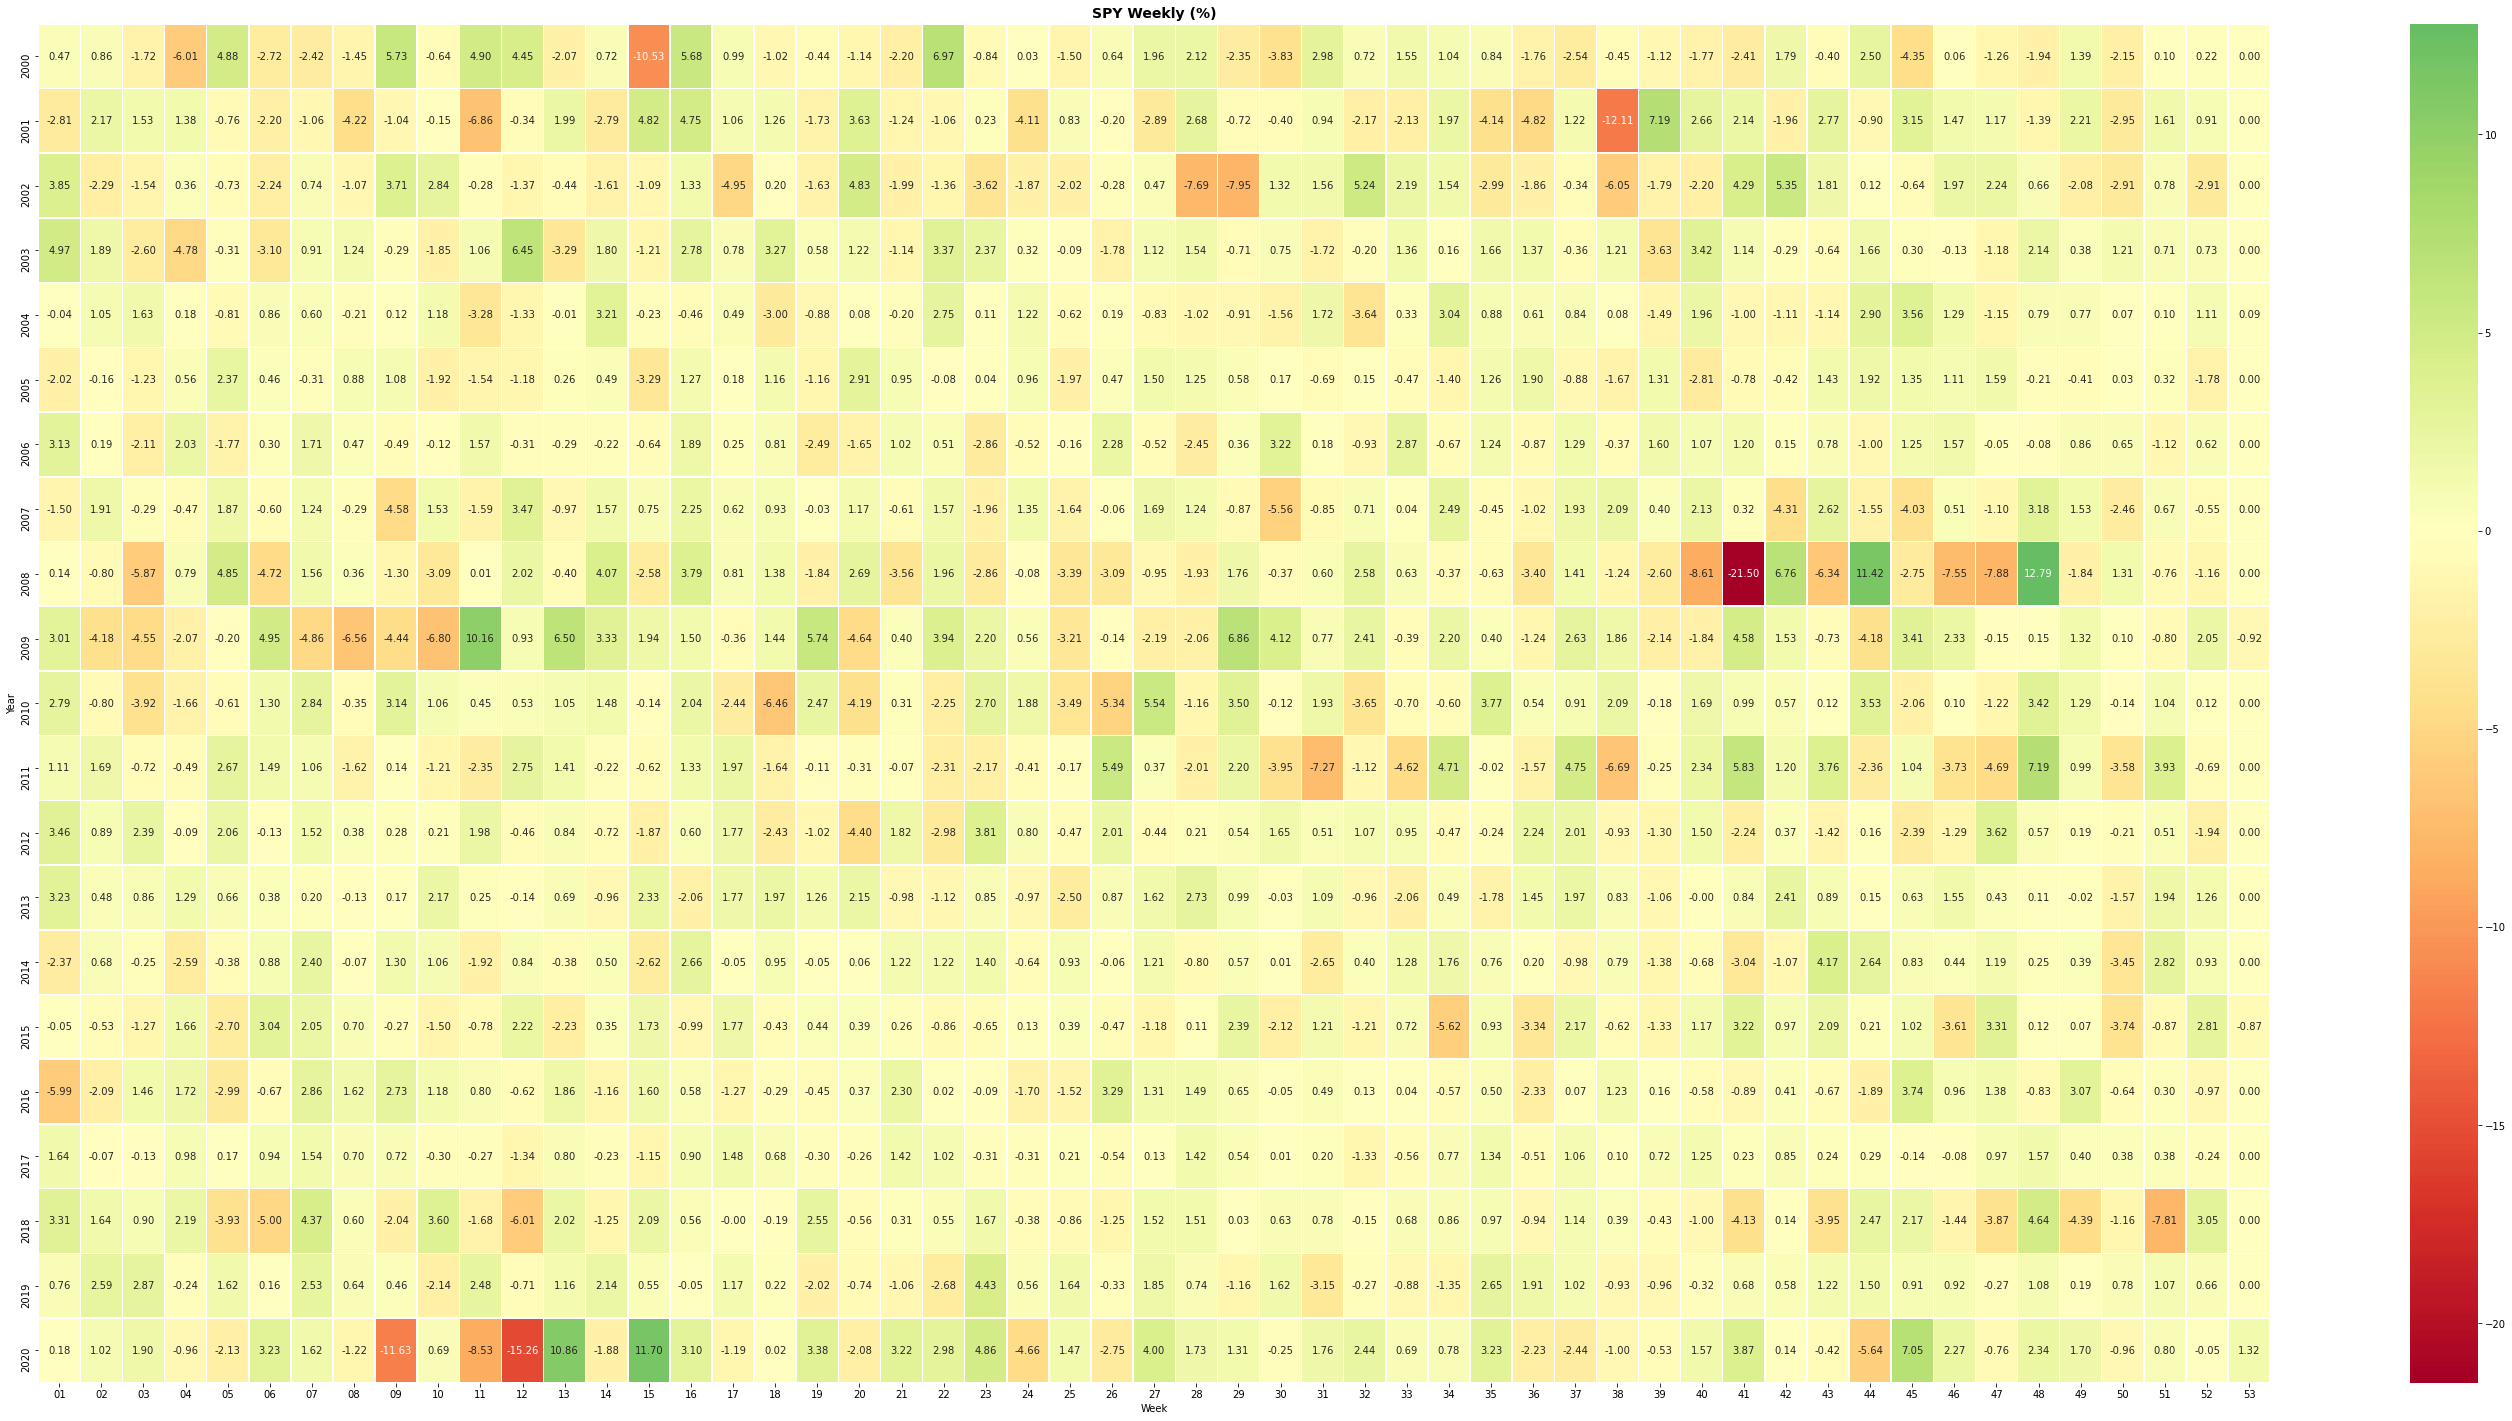

In [29]:
wrh.plot(heat, title="SPY Weekly (%)", figsize=(50,25))

In [31]:
import numpy as np
poss = []
negs = []


pos = 0
neg = 0
for c in heat.columns:
    for i in heat[c]:
        if i > 0:
            pos+=1
        elif i < 0: 
            neg+=1
    print(c)
    poss.append(pos)
    negs.append(neg)
    print("Num POS: ", pos)
    print("NUM NEG: ", neg)
    print("\n")
    pos=0
    neg=0
    
positive = pd.Series(poss)
negative = pd.Series(negs)

01
Num POS:  14
NUM NEG:  7


02
Num POS:  13
NUM NEG:  8


03
Num POS:  8
NUM NEG:  13


04
Num POS:  11
NUM NEG:  10


05
Num POS:  9
NUM NEG:  12


06
Num POS:  12
NUM NEG:  9


07
Num POS:  17
NUM NEG:  4


08
Num POS:  10
NUM NEG:  11


09
Num POS:  12
NUM NEG:  9


10
Num POS:  10
NUM NEG:  11


11
Num POS:  10
NUM NEG:  11


12
Num POS:  9
NUM NEG:  12


13
Num POS:  12
NUM NEG:  9


14
Num POS:  11
NUM NEG:  10


15
Num POS:  9
NUM NEG:  12


16
Num POS:  17
NUM NEG:  4


17
Num POS:  14
NUM NEG:  7


18
Num POS:  13
NUM NEG:  8


19
Num POS:  7
NUM NEG:  14


20
Num POS:  11
NUM NEG:  10


21
Num POS:  11
NUM NEG:  10


22
Num POS:  12
NUM NEG:  9


23
Num POS:  12
NUM NEG:  9


24
Num POS:  10
NUM NEG:  11


25
Num POS:  6
NUM NEG:  15


26
Num POS:  8
NUM NEG:  13


27
Num POS:  14
NUM NEG:  7


28
Num POS:  13
NUM NEG:  8


29
Num POS:  14
NUM NEG:  7


30
Num POS:  10
NUM NEG:  11


31
Num POS:  15
NUM NEG:  6


32
Num POS:  10
NUM NEG:  11


33
Num POS:  13
NUM NEG:  8




In [32]:
data=[]
df = pd.DataFrame(data, columns=['MEAN', 'MAX', 'MIN', '#POS', '#NEG', 'SD'])
df['MEAN'] = round(heat.mean(),2).values
df['MAX'] = round(heat.max(),2).values
df['MIN'] = round(heat.min(),2).values
df['#POS'] = positive.values
df['#NEG'] = negative.values
df['SD'] = round(heat.std(),2).values
df

MEAN    MAX    MIN  #POS  #NEG    SD
0   0.82   4.97  -5.99    14     7  2.70
1   0.29   2.59  -4.18    13     8  1.67
2  -0.60   2.87  -5.87     8    13  2.34
3  -0.30   2.19  -6.01    11    10  2.15
4   0.18   4.88  -3.93     9    12  2.37
5  -0.16   4.95  -5.00    12     9  2.50
6   1.01   4.37  -4.86    17     4  1.98
7  -0.46   1.62  -6.56    10    11  1.89
8  -0.31   5.73 -11.63    12     9  3.53
9  -0.20   3.60  -6.80    10    11  2.29
10 -0.26  10.16  -8.53    10    11  3.80
11 -0.26   6.45 -15.26     9    12  4.29
12  0.92  10.86  -3.29    12     9  3.01
13  0.41   4.07  -2.79    11    10  1.82
14  0.07  11.70 -10.53     9    12  4.02
15  1.59   5.68  -2.06    17     4  1.84
16  0.23   1.97  -4.95    14     7  1.63
17 -0.06   3.27  -6.46    13     8  2.06
18  0.11   5.74  -2.49     7    14  2.02
19 -0.02   4.83  -4.64    11    10  2.53
20  0.01   3.22  -3.56    11    10  1.61
21  0.58   6.97  -2.98    12     9  2.51
22  0.44   4.86  -3.62    12     9  2.41
23 -0.37   1.88  -4.66    10    11  1.63
24 -0.86   1.64  -3.49     6    15  1.55
25 -0.05   5.49  -5.34     8    13  2.27
26  0.73   5.54  -2.89    14     7  1.93
27 -0.02   2.73  -7.69    13     8  2.40
28  0.36   6.86  -7.95    14     7  2.72
29 -0.23   4.12  -5.56    10    11  2.27
30  0.02   2.98  -7.27    15     6  2.24
31  0.01   5.24  -3.65    10    11  2.07
32  0.07   2.87  -4.62    13     8  1.64
33  0.51   4.71  -5.62    13     8  2.08
34  0.48   3.77  -4.14    14     7  1.85
35 -0.75   2.24  -4.82     8    13  1.94
36  0.80   4.75  -2.54    15     6  1.69
37 -1.02   2.09 -12.11    10    11  3.40
38 -0.42   7.19  -3.63     6    15  2.15
39  0.05   3.42  -8.61    11    10  2.64
40 -0.32   5.83 -21.50    13     8  5.51
41  0.67   6.76  -4.31    15     6  2.30
42  0.29   4.17  -6.34    12     9  2.43
43  0.66  11.42  -5.64    14     7  3.41
44  0.67   7.05  -4.35    14     7  2.77
45 -0.06   2.33  -7.55    14     7  2.39
46 -0.37   3.62  -7.88     9    12  2.66
47  1.74  12.79  -1.94    16     5  3.29
48  0.38   3.07  -4.39    16     5  1.61
49 -1.02   1.31  -3.74     8    13  1.65
50  0.27   3.93  -7.81    16     5  2.21
51  0.20   3.05  -2.91    12     9  1.50
52 -0.02   1.32  -0.92     2     2  0.41

In [36]:
#TIME NOW:
my_date = datetime.date.today()
year, week_num, day_of_week = my_date.isocalendar()
print("Week #" + str(week_num) + " of year " + str(year))

Week #22 of year 2021


# WAY#0 MONTHLY

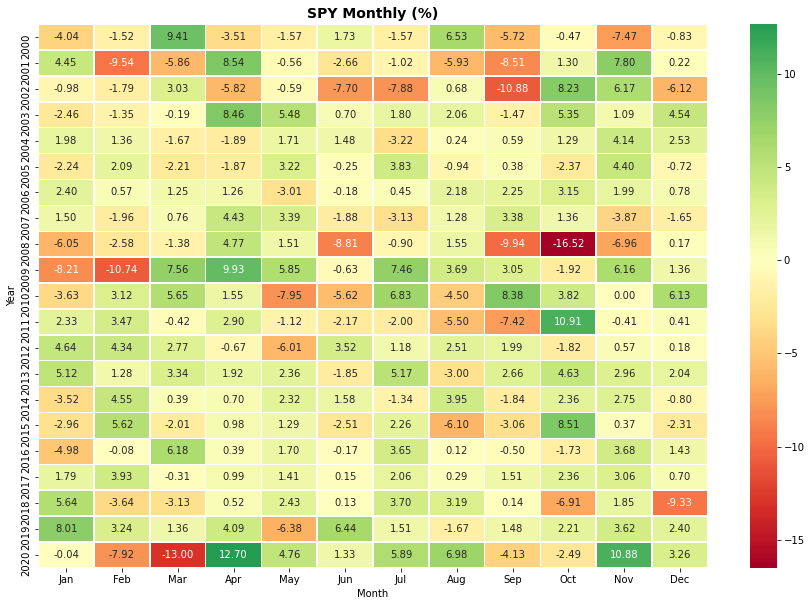

In [3]:
from pandas_datareader import data
import monthly_returns_heatmap as mrh

prices = data.get_data_yahoo("SPY", start="2000-1-1", end="2020-12-31")['Close']
returns = prices.pct_change()
wrh.plot(returns, title="SPY Monthly (%)", figsize=(15,10))

In [4]:
prices[:20]

Date
2000-01-03    145.43750
2000-01-04    139.75000
2000-01-05    140.00000
2000-01-06    137.75000
2000-01-07    145.75000
2000-01-10    146.25000
2000-01-11    144.50000
2000-01-12    143.06250
2000-01-13    145.00000
2000-01-14    146.96875
2000-01-18    145.81250
2000-01-19    147.00000
2000-01-20    144.75000
2000-01-21    144.43750
2000-01-24    140.34375
2000-01-25    141.93750
2000-01-26    140.81250
2000-01-27    140.25000
2000-01-28    135.87500
2000-01-31    139.56250
Name: Close, dtype: float64

In [5]:
prices.pct_change()

Date
2000-01-03         NaN
2000-01-04   -0.039106
2000-01-05    0.001789
2000-01-06   -0.016071
2000-01-07    0.058076
                ...   
2020-12-24    0.003890
2020-12-28    0.008591
2020-12-29   -0.001908
2020-12-30    0.001427
2020-12-31    0.005081
Name: Close, Length: 5284, dtype: float64

In [6]:
def sum_returns(returns, groupby, compounded=True):
    def returns_prod(data):
        return (data + 1).prod() - 1
    if compounded:
        return returns.groupby(groupby).apply(returns_prod)
    return returns.groupby(groupby).agg(['first','last'])

In [7]:
returns = prices
returns = pd.DataFrame(sum_returns(returns, 
                       returns.index.strftime('%Y-%m-01'),
                                       False))

returns

first        last
Date                              
2000-01-01  145.437500  139.562500
2000-02-01  140.937500  137.437500
2000-03-01  138.437500  150.375000
2000-04-01  151.250000  145.093750
2000-05-01  147.062500  142.812500
...                ...         ...
2020-08-01  328.790009  349.309998
2020-09-01  352.600006  334.890015
2020-10-01  337.040009  326.540009
2020-11-01  330.200012  362.059998
2020-12-01  366.019989  373.880005

[252 rows x 2 columns]

In [8]:
returns['Returns'] = (returns['last']-returns['first'])/returns['first']

returns.drop(['first', 'last'], axis=1, inplace=True)

returns.columns = ['Returns']

returns.index = pd.to_datetime(returns.index)

# get returnsframe
returns['Year'] = returns.index.strftime('%Y')
returns['Month'] = returns.index.strftime('%b')

# make pivot table
returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)

# handle missing months
for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
    if month not in returns.columns:
        returns.loc[:, month] = 0

# order columns by month
returns = returns[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

heat = returns
heat = heat*100
print(heat)

Month        Jan        Feb        Mar        Apr       May       Jun       Jul       Aug       Sep        Oct       Nov        Dec
Year                                                                                                                               
2000   -4.039536  -2.483370   8.623025  -4.070248 -2.889928 -0.021505 -2.906853  5.886186 -5.819672  -0.619161 -7.150691  -0.779957
2001    6.371668 -10.135573  -6.348312  10.910689 -0.865806 -3.258901 -2.239587 -6.518712 -7.917471   1.467351  5.105521   0.820323
2002   -2.034102  -1.331558   0.685774  -5.856681 -1.795200 -5.183485 -6.049670  3.379139 -7.351606   3.266444  4.109900  -6.267921
2003   -5.501265  -1.542389   0.772983   6.822411  5.495098  0.287621  0.872831  2.974318 -2.772379   3.154390  0.434002   3.420075
2004    2.022836   0.921291  -2.634302  -2.478467  0.633080  1.614763 -1.859400  0.036014  0.395259  -0.395957  3.858688   1.375492
2005   -1.778886   1.446467  -2.697356  -1.430640  2.646050 -1.095435  3.522

(<Figure size 1080x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x119f67640>)

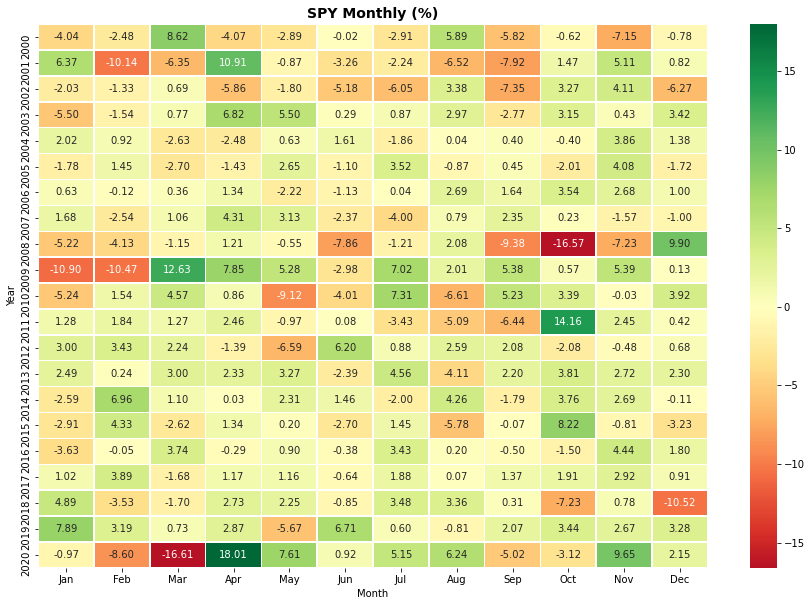

In [9]:
wrh.plot(heat, title="SPY Monthly (%)", figsize=(15,10))

In [220]:
for c in heat.columns:
    print(round(heat[c].mean(),2))

-0.64
-0.82
0.25
2.32
0.2
-0.84
0.79
0.32
-1.12
0.83
1.75
0.4


In [221]:
for c in heat.columns:
    print(round(heat[c].max(),2))

7.89
6.96
12.63
18.01
7.61
6.71
7.31
6.24
5.38
14.16
9.65
9.9


In [222]:
for c in heat.columns:
    print(round(heat[c].min(),2))

-10.9
-10.47
-16.61
-5.86
-9.12
-7.86
-6.05
-6.61
-9.38
-16.57
-7.23
-10.52


In [223]:
for c in heat.columns:
    print(round(heat[c].std(),2))

4.47
4.65
5.62
5.26
4.08
3.32
3.66
3.92
4.3
5.89
3.89
3.97


In [195]:
pos = 0
neg = 0
for c in heat.columns:
    for i in heat[c]:
        if i > 0:
            pos+=1
        elif i < 0: 
            neg+=1
    print(c)
    print("Num POS: ", pos)
    print("NUM NEG: ", neg)
    print("\n")
    pos=0
    neg=0

Jan
Num POS:  10
NUM NEG:  11


Feb
Num POS:  10
NUM NEG:  11


Mar
Num POS:  13
NUM NEG:  8


Apr
Num POS:  15
NUM NEG:  6


May
Num POS:  12
NUM NEG:  9


Jun
Num POS:  7
NUM NEG:  14


Jul
Num POS:  13
NUM NEG:  8


Aug
Num POS:  14
NUM NEG:  7


Sep
Num POS:  11
NUM NEG:  10


Oct
Num POS:  13
NUM NEG:  8


Nov
Num POS:  15
NUM NEG:  6


Dec
Num POS:  14
NUM NEG:  7




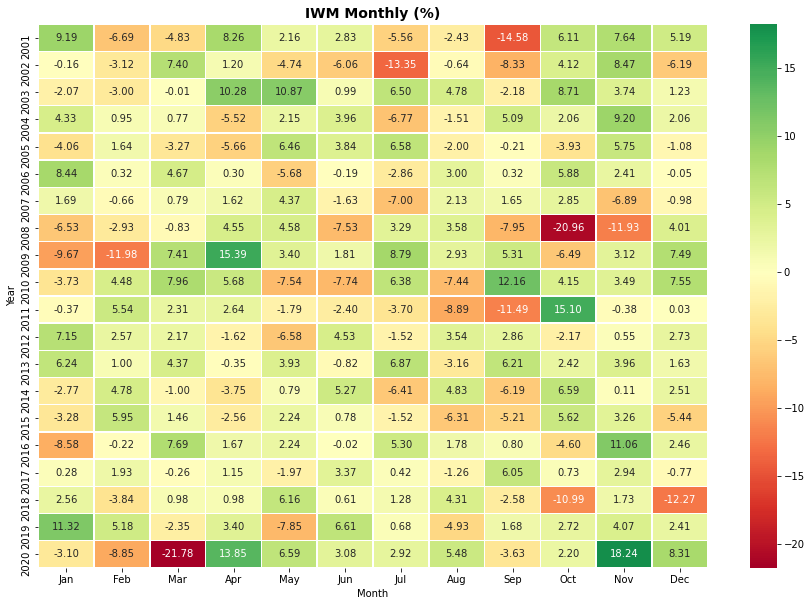

In [7]:
from pandas_datareader import data
import monthly_returns_heatmap as mrh

prices = data.get_data_yahoo("IWM", start="2001-1-1", end="2020-12-31")['Close']
returns = prices.pct_change()
mrh.plot(returns, title="IWM Monthly (%)", figsize=(15,10))

In [8]:
heat = mrh.get(returns)
heat = heat*100
heat

Month        Jan        Feb        Mar        Apr        May       Jun        Jul       Aug        Sep        Oct        Nov        Dec
Year                                                                                                                                   
2001    9.191750  -6.689792  -4.832717   8.258930   2.164947  2.825432  -5.564277 -2.431678 -14.580895   6.109728   7.638073   5.185590
2002   -0.155684  -3.118503   7.403435   1.198806  -4.738404 -6.062175 -13.348040 -0.636537  -8.327995   4.122986   8.469795  -6.187353
2003   -2.070967  -3.003766  -0.013890  10.277780  10.869014  0.988303   6.501686  4.784536  -2.177196   8.706849   3.744073   1.233446
2004    4.332126   0.951556   0.771210  -5.518706   2.151021  3.955945  -6.771759 -1.509094   5.085843   2.055339   9.200443   2.064945
2005   -4.061778   1.641984  -3.270508  -5.656982   6.464773  3.838943   6.577706 -2.003241  -0.210430  -3.931316   5.754152  -1.082277
2006    8.438245   0.317904   4.670707   0.302745  -5.682407 -0.194795  -2.857944  2.999421   0.320473   5.875005   2.413743  -0.051237
2007    1.691657  -0.655320   0.786496   1.623664   4.372057 -1.625721  -6.996385  2.127107   1.651007   2.848574  -6.887753  -0.978474
2008   -6.534913  -2.932058  -0.827766   4.554108   4.579827 -7.526443   3.287468  3.575439  -7.946396 -20.955882 -11.925581   4.013522
2009   -9.666941 -11.982909   7.407401  15.386448   3.400655  1.813840   8.790129  2.933239   5.314687  -6.490703   3.124442   7.488377
2010   -3.731579   4.475127   7.961790   5.678464  -7.536638 -7.743398   6.380886 -7.443858  12.163509   4.148153   3.485060   7.546389
2011   -0.370656   5.542014   2.309471   2.637521  -1.794193 -2.404518  -3.695658 -8.891393 -11.493459  15.101087  -0.378326   0.027121
2012    7.145758   2.568978   2.171492  -1.618158  -6.579110  4.532909  -1.520864  3.535424   2.859960  -2.169230   0.551274   2.729042
2013    6.238143   1.004690   4.365602  -0.349467   3.931992 -0.817999   6.865983 -3.164197   6.206419   2.420037   3.956406   1.629811
2014   -2.773922   4.778881  -1.004085  -3.747630   0.785852  5.272016  -6.413598  4.829567  -6.185655   6.593506   0.111535   2.510927
2015   -3.277049   5.946418   1.460272  -2.564929   2.236342  0.782954  -1.521706 -6.310997  -5.208333   5.622710   3.259929  -5.440803
2016   -8.577520  -0.223384   7.690055   1.672246   2.240395 -0.017388   5.296570  1.784095   0.795257  -4.597053  11.063292   2.461823
2017    0.281787   1.930046  -0.261173   1.149259  -1.970366  3.374406   0.418675 -1.257861   6.047375   0.728845   2.941176  -0.774479
2018    2.558044  -3.843691   0.984367   0.981364   6.163577  0.614364   1.282281  4.310610  -2.583517 -10.987840   1.726319 -12.265759
2019   11.321885   5.179123  -2.353618   3.396693  -7.852671  6.609077   0.681670 -4.931018   1.679656   2.715740   4.065621   2.410826
2020   -3.102553  -8.845697 -21.779541  13.847631   6.591970  3.081353   2.919408  5.476379  -3.628643   2.203086  18.244176   8.308470

In [14]:
for c in heat.columns:
    print(round(heat[c].mean(),2))

0.34
-0.35
0.68
2.58
0.99
0.56
0.02
-0.11
-1.01
1.01
3.53
1.04


In [15]:
for c in heat.columns:
    print(round(heat[c].max(),2))

11.32
5.95
7.96
15.39
10.87
6.61
8.79
5.48
12.16
15.1
18.24
8.31


In [16]:
for c in heat.columns:
    print(round(heat[c].min(),2))

-9.67
-11.98
-21.78
-5.66
-7.85
-7.74
-13.35
-8.89
-14.58
-20.96
-11.93
-12.27


In [17]:
for c in heat.columns:
    print(round(heat[c].std(),2))

5.95
4.91
6.46
5.79
5.29
4.06
5.95
4.4
6.64
7.74
6.24
4.91


In [18]:
pos = 0
neg = 0
for c in heat.columns:
    for i in heat[c]:
        if i > 0:
            pos+=1
        elif i < 0: 
            neg+=1
    print(c)
    print("Num POS: ", pos)
    print("NUM NEG: ", neg)
    print("\n")
    pos=0
    neg=0

Jan
Num POS:  9
NUM NEG:  11


Feb
Num POS:  11
NUM NEG:  9


Mar
Num POS:  12
NUM NEG:  8


Apr
Num POS:  14
NUM NEG:  6


May
Num POS:  13
NUM NEG:  7


Jun
Num POS:  12
NUM NEG:  8


Jul
Num POS:  11
NUM NEG:  9


Aug
Num POS:  10
NUM NEG:  10


Sep
Num POS:  10
NUM NEG:  10


Oct
Num POS:  14
NUM NEG:  6


Nov
Num POS:  17
NUM NEG:  3


Dec
Num POS:  13
NUM NEG:  7




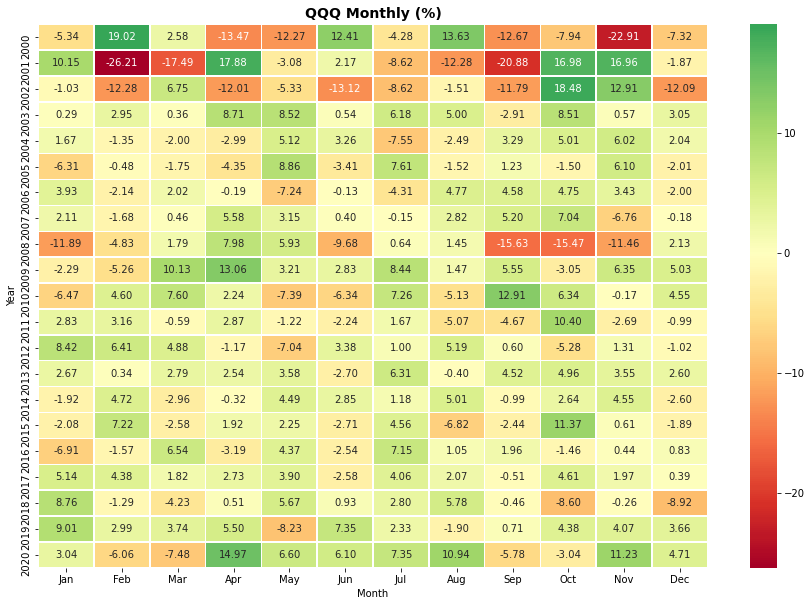

In [23]:
from pandas_datareader import data
import monthly_returns_heatmap as mrh

prices = data.get_data_yahoo("QQQ", start="2000-1-1", end="2020-12-31")['Close']
returns = prices.pct_change()
mrh.plot(returns, title="QQQ Monthly (%)", figsize=(15,10))

In [24]:
heat = mrh.get(returns)
heat = heat*100
heat

Month        Jan        Feb        Mar        Apr        May        Jun       Jul        Aug        Sep        Oct        Nov        Dec
Year                                                                                                                                    
2000   -5.343008  19.024390   2.576112 -13.470320 -12.269129  12.406015 -4.280936  13.626834 -12.669127  -7.940141 -22.910690  -7.318283
2001   10.149898 -26.205290 -17.492095  17.879948  -3.076927   2.168570 -8.621449 -12.284477 -20.884524  16.977233  16.961651  -1.866335
2002   -1.028017 -12.282523   6.749564 -12.007769  -5.326185 -13.115847 -8.620690  -1.509436 -11.792254  18.484556  12.912424 -12.085132
2003    0.287237   2.945987   0.357711   8.712874   8.524590   0.537092  6.176956   5.000001  -2.905065   8.513270   0.568507   3.052566
2004    1.673068  -1.348800  -1.996170  -2.985490   5.119352   3.255821 -7.551675  -2.493548   3.292178   5.008543   6.016253   2.044988
2005   -6.312617  -0.481284  -1.746377  -4.347827   8.862214  -3.413873  7.612842  -1.515923   1.231400  -1.495185   6.097254  -2.012613
2006    3.934670  -2.142861   2.019469  -0.190799  -7.240141  -0.128798 -4.307459   4.770891   4.579374   4.747848   3.428838  -1.998186
2007    2.108433  -1.679142   0.461567   5.582358   3.154919   0.400756 -0.147058   2.819272   5.197465   7.041430  -6.759945  -0.175405
2008  -11.889887  -4.830490   1.792783   7.982612   5.930945  -9.678065  0.642021   1.451825 -15.633129 -15.471602 -11.462446   2.129117
2009   -2.286484  -5.264965  10.134395  13.060683   3.208875   2.826456  8.438701   1.470210   5.545844  -3.053257   6.347662   5.027545
2010   -6.469943   4.603873   7.596072   2.242529  -7.392370  -6.337718  7.258259  -5.129889  12.908423   6.337886  -0.172480   4.549816
2011    2.827765   3.160715  -0.588541   2.873066  -1.218689  -2.244690  1.665207  -5.068963  -4.667635  10.401979  -2.691978  -0.993080
2012    8.418407   6.410053   4.875018  -1.169505  -7.040145   3.383826  0.997505   5.185186   0.601520  -5.279281   1.308708  -1.018246
2013    2.671588   0.343945   2.786889   2.537335   3.577487  -2.703076  6.314017  -0.395929   4.518346   4.956901   3.551156   2.601185
2014   -1.921331   4.717746  -2.955500  -0.319378   4.485637   2.847450  1.181975   5.009474  -0.992181   2.641968   4.546352  -2.603530
2015   -2.082326   7.220577  -2.583029   1.922347   2.248449  -2.707863  4.557763  -6.824475  -2.444632  11.369889   0.608837  -1.894401
2016   -6.910427  -1.565348   6.536582  -3.186809   4.370029  -2.537607  7.150830   1.050073   1.958089  -1.457213   0.435937   0.834045
2017    5.140105   4.375054   1.815106   2.726998   3.897336  -2.583335  4.061317   2.073589  -0.512996   4.606392   1.971738   0.393168
2018    8.757062  -1.292791  -4.234197   0.505837   5.672925   0.929021  2.796390   5.780673  -0.460756  -8.595719  -0.264994  -8.921297
2019    9.010767   2.991198   3.735782   5.499271  -8.225175   7.352693  2.334797  -1.899532   0.714779   4.380067   4.069416   3.661626
2020    3.038430  -6.057426  -7.482998  14.973745   6.600885   6.102162  7.346527  10.944729  -5.778625  -3.044915  11.225774   4.712634

In [25]:
for c in heat.columns:
    print(round(heat[c].mean(),2))

0.66
-0.35
0.59
2.32
0.66
-0.15
1.67
1.05
-1.82
2.82
1.7
-0.57


In [26]:
for c in heat.columns:
    print(round(heat[c].max(),2))

10.15
19.02
10.13
17.88
8.86
12.41
8.44
13.63
12.91
18.48
16.96
5.03


In [27]:
for c in heat.columns:
    print(round(heat[c].min(),2))

-11.89
-26.21
-17.49
-13.47
-12.27
-13.12
-8.62
-12.28
-20.88
-15.47
-22.91
-12.09


In [28]:
for c in heat.columns:
    print(round(heat[c].std(),2))

5.96
8.61
5.95
7.74
6.27
5.65
5.5
5.9
7.95
8.4
8.4
4.49


In [29]:
pos = 0
neg = 0
for c in heat.columns:
    for i in heat[c]:
        if i > 0:
            pos+=1
        elif i < 0: 
            neg+=1
    print(c)
    print("Num POS: ", pos)
    print("NUM NEG: ", neg)
    print("\n")
    pos=0
    neg=0

Jan
Num POS:  12
NUM NEG:  9


Feb
Num POS:  10
NUM NEG:  11


Mar
Num POS:  13
NUM NEG:  8


Apr
Num POS:  13
NUM NEG:  8


May
Num POS:  13
NUM NEG:  8


Jun
Num POS:  11
NUM NEG:  10


Jul
Num POS:  15
NUM NEG:  6


Aug
Num POS:  12
NUM NEG:  9


Sep
Num POS:  10
NUM NEG:  11


Oct
Num POS:  13
NUM NEG:  8


Nov
Num POS:  15
NUM NEG:  6


Dec
Num POS:  10
NUM NEG:  11




In [30]:
heat.corr()

Month       Jan       Feb       Mar       Apr       May       Jun       Jul       Aug       Sep       Oct       Nov       Dec
Month                                                                                                                        
Jan    1.000000 -0.244298 -0.405588  0.290173 -0.196915  0.386996 -0.261255 -0.089955 -0.012604  0.318671  0.429835 -0.088053
Feb   -0.244298  1.000000  0.448099 -0.508482 -0.194592  0.333247  0.317262  0.484404  0.374091 -0.363117 -0.713282  0.012347
Mar   -0.405588  0.448099  1.000000 -0.422088 -0.244019 -0.244532  0.306082  0.217676  0.519145 -0.210659 -0.324612  0.117475
Apr    0.290173 -0.508482 -0.422088  1.000000  0.333873  0.118992  0.283094 -0.243260 -0.085813  0.051578  0.369623  0.641543
May   -0.196915 -0.194592 -0.244019  0.333873  1.000000 -0.219174  0.453225  0.020030  0.091499 -0.172517  0.200355  0.271193
Jun    0.386996  0.333247 -0.244532  0.118992 -0.219174  1.000000 -0.030401  0.451511  0.008826 -0.259472 -0.190875  0.149006
Jul   -0.261255  0.317262  0.306082  0.283094  0.453225 -0.030401  1.000000  0.145076  0.520099 -0.333076 -0.058116  0.551820
Aug   -0.089955  0.484404  0.217676 -0.243260  0.020030  0.451511  0.145076  1.000000  0.046228 -0.626528 -0.456203 -0.117617
Sep   -0.012604  0.374091  0.519145 -0.085813  0.091499  0.008826  0.520099  0.046228  1.000000 -0.037201  0.021450  0.413131
Oct    0.318671 -0.363117 -0.210659  0.051578 -0.172517 -0.259472 -0.333076 -0.626528 -0.037201  1.000000  0.535525 -0.127205
Nov    0.429835 -0.713282 -0.324612  0.369623  0.200355 -0.190875 -0.058116 -0.456203  0.021450  0.535525  1.000000  0.095322
Dec   -0.088053  0.012347  0.117475  0.641543  0.271193  0.149006  0.551820 -0.117617  0.413131 -0.127205  0.095322  1.000000

In [34]:
import seaborn as sns

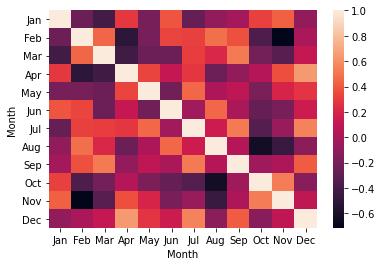

In [41]:
ax = sns.heatmap(heat.corr())
ax.figsize=(30,10)

# WAY#1

In [74]:
#define the ticker symbol
tickerSymbol = 'SPY'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', interval='1d', start='2020-01-02', end='2021-05-30')

#see your data
tickerDf

Open        High         Low       Close    Volume  \
Date                                                                   
2020-01-02  316.571857  317.892788  315.583600  317.873199  59151200   
2020-01-03  314.243138  316.669737  314.184433  315.466217  77709700   
2020-01-06  313.587557  316.757797  313.460352  316.669739  55653900   
2020-01-07  316.063060  316.571880  315.299860  315.779327  40496400   
2020-01-08  315.984822  318.763653  315.720648  317.462311  68296000   
...                ...         ...         ...         ...       ...   
2021-05-24  417.339996  420.320007  417.079987  419.170013  51376700   
2021-05-25  420.329987  420.709991  417.619995  418.239990  57451400   
2021-05-26  418.869995  419.609985  417.760010  419.070007  43088600   
2021-05-27  420.170013  420.720001  418.989990  419.290009  56707700   
2021-05-28  420.970001  421.250000  419.790009  420.040009  58486000   

            Dividends  Stock Splits  
Date                                 
2020-01-02        0.0             0  
2020-01-03        0.0             0  
2020-01-06        0.0             0  
2020-01-07        0.0             0  
2020-01-08        0.0             0  
...               ...           ...  
2021-05-24        0.0             0  
2021-05-25        0.0             0  
2021-05-26        0.0             0  
2021-05-27        0.0             0  
2021-05-28        0.0             0  

[355 rows x 7 columns]

In [116]:
tickerData.info

{'previousClose': 419.29,
 'regularMarketOpen': 420.97,
 'twoHundredDayAverage': 389.2886,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 421.25,
 'navPrice': 419.84,
 'averageDailyVolume10Day': 57271583,
 'totalAssets': 363964497920,
 'regularMarketPreviousClose': 419.29,
 'fiftyDayAverage': 415.7417,
 'trailingAnnualDividendRate': None,
 'open': 420.97,
 'toCurrency': None,
 'averageVolume10days': 57271583,
 'expireDate': None,
 'yield': 0.013300001,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 419.79,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVolume': 58520164,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': None,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 84227378,
 'priceToSalesTrailing12Months': None,
 'dayLow': 419.79,
 'ask': 420.04,
 'ytdReturn'

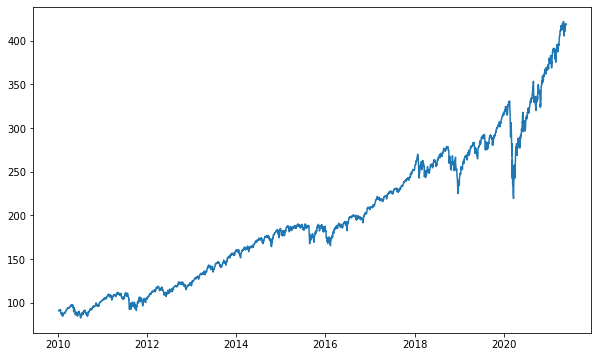

In [37]:
plt.figure(figsize=(10,6))
plt.plot(tickerDf['Close'])
plt.show()

In [38]:
tickerDf = tickerDf.reset_index()
for i in ['Open', 'High', 'Close', 'Low']: 
      tickerDf[i]  =  tickerDf[i].astype('float64')

In [39]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=tickerDf['Date'], 
                                     open=tickerDf['Open'], 
                                     high=tickerDf['High'],
                                     low=tickerDf['Low'],
                                     close=tickerDf['Close'])])
fig.show()

# WAY#2

[*********************100%***********************]  1 of 1 completed


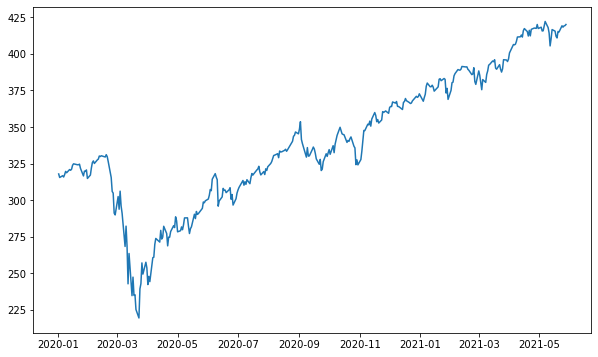

In [16]:
# Get the data for the stock AAPL
data = yf.download('SPY','2020-01-01','2021-05-31')

# Plot the close price of the AAPL
plt.figure(figsize=(10,6))
plt.plot(data['Adj Close'])
plt.show()

In [161]:
import pandas as pd
tickers_list = ['AAPL', 'BA', 'SPY', 'NIO', 'QS', 'ABNB', 'RKT']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2015-1-1')['Adj Close']

# Print first 5 rows of the data
print(data.head())

[*********************100%***********************]  7 of 7 completed
                 AAPL  ABNB          BA  NIO  QS  RKT         SPY
Date                                                             
2015-01-02  24.819241   NaN  113.657227  NaN NaN  NaN  182.149979
2015-01-05  24.120045   NaN  112.870056  NaN NaN  NaN  178.860443
2015-01-06  24.122320   NaN  111.540627  NaN NaN  NaN  177.175781
2015-01-07  24.460564   NaN  113.272369  NaN NaN  NaN  179.383591
2015-01-08  25.400398   NaN  115.275284  NaN NaN  NaN  182.566742


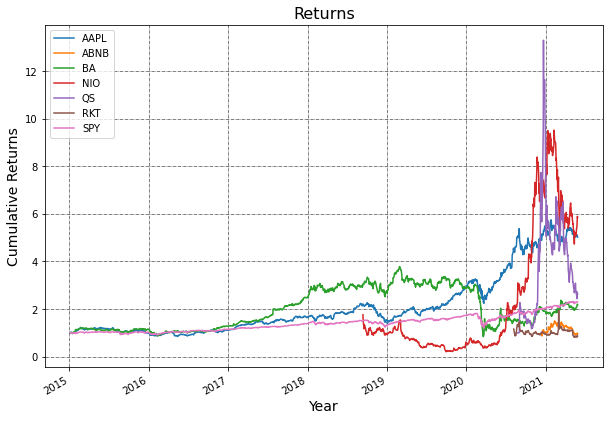

In [162]:

# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.figsize=(20,15)
plt.show()

# WAY#3:

In [174]:
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
multpl_stocks = web.get_data_yahoo(tickers,
start = "2010-01-01",
end = "2021-06-01")

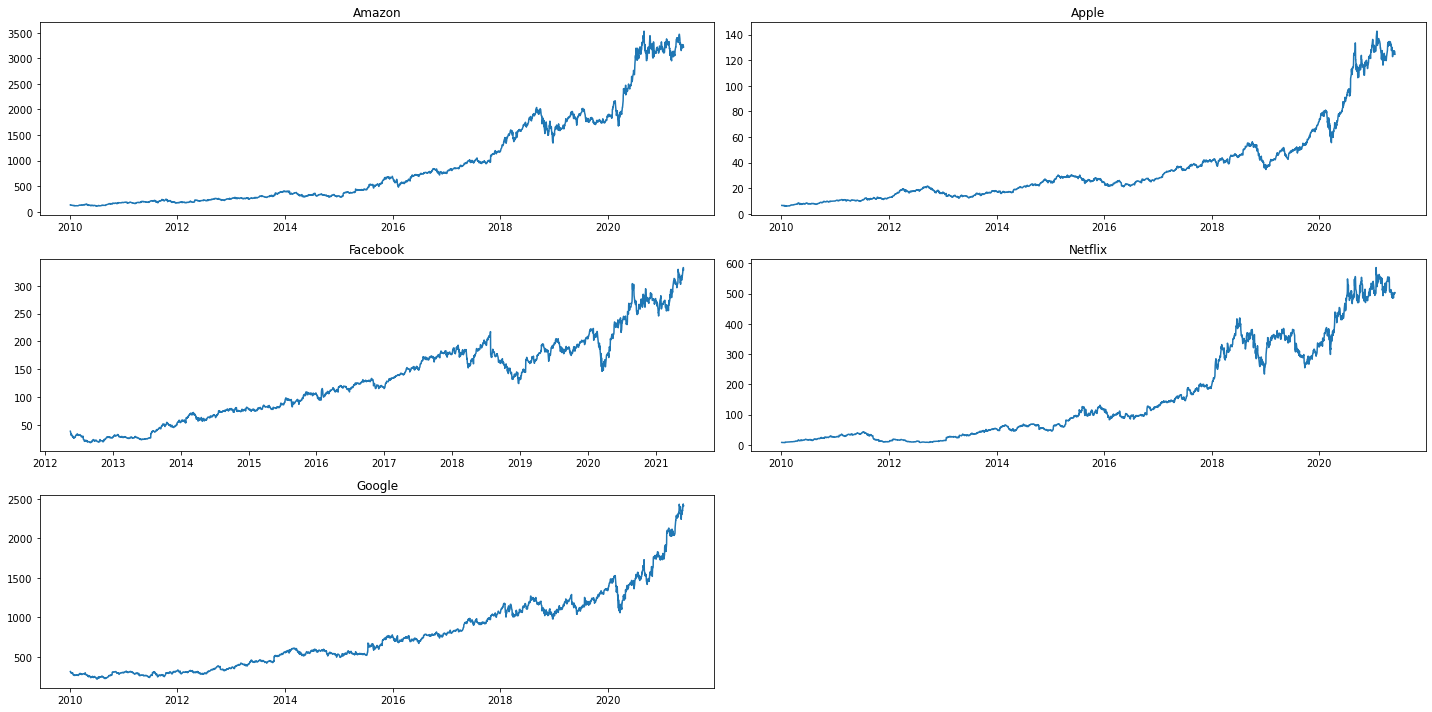

In [178]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(multpl_stocks['Adj Close']['AMZN'])
ax1.set_title("Amazon")
ax2.plot(multpl_stocks['Adj Close']['AAPL'])
ax2.set_title("Apple")
ax3.plot(multpl_stocks['Adj Close']['FB'])
ax3.set_title("Facebook")
ax4.plot(multpl_stocks['Adj Close']['NFLX'])
ax4.set_title("Netflix")
ax5.plot(multpl_stocks['Adj Close']['GOOG'])
ax5.set_title("Google")
plt.tight_layout()
plt.show()

In [186]:
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()

<Figure size 1440x720 with 0 Axes>

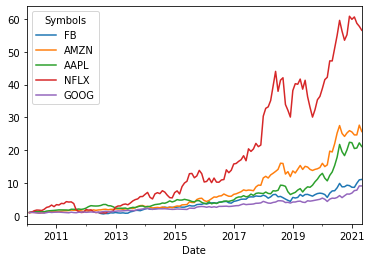

In [187]:
fig = plt.figure(figsize=(20,10))
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.show()

In [188]:
print(multpl_stock_monthly_returns.corr())

Symbols        FB      AMZN      AAPL      NFLX      GOOG
Symbols                                                  
FB       1.000000  0.355576  0.264768  0.312269  0.322820
AMZN     0.355576  1.000000  0.423733  0.345159  0.485502
AAPL     0.264768  0.423733  1.000000  0.134968  0.380293
NFLX     0.312269  0.345159  0.134968  1.000000  0.086389
GOOG     0.322820  0.485502  0.380293  0.086389  1.000000


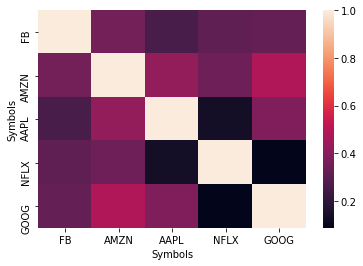

In [190]:
import seaborn as sns
sns.heatmap(multpl_stock_monthly_returns.corr())